# Business Analysis

* **pos**: till identifier

* **store:** Store code 

* **transaction**: number assigned by the till to the transaction, bear in mind that this number is unique on a single pos, but can be repeated if compared with other tills

* **date:** date when the transaction occurred

* **shifted_date:** we won't consider this value

* **vat:** tax % applied to sell

* **currency:** all transactions are done on CLP

* **net_amount:** transactions net_amount

* **vat_amount:** tax amount for the transaction

* **item:** SKU

* **size:** size of the item, if not size is applicable NS is used

# Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from copy import deepcopy

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.colheader_justify', 'center')
sns.set_theme()
%matplotlib inline

# Import

In [3]:
df_main = pd.read_csv("sales_detail_report.csv", delimiter=";")

In [4]:
df = deepcopy(df_main)

In [5]:
df.head()

Store No. POS Terminal No.  Transaction No.    Date    Shifted Date  VAT %  \
0    CL104       CL10401          180560       01/02/18      NaN        19     
1    CL104       CL10401          180563       01/02/18      NaN        19     
2    CL104       CL10401          180564       01/02/18      NaN        19     
3    CL104       CL10401          180569       01/02/18      NaN        19     
4    CL104       CL10401          180570       01/02/18      NaN        19     

  Area HO Currency Code  Net Amount  VAT Amount Item No. Size Description  
0           CLP           27,723.00    5,267.00  BY1610          8         
1           CLP          -52,933.00  -10,057.00  BA8899         9-         
2           CLP           52,933.00   10,057.00  BA8899         8-         
3           CLP           13,437.00    2,553.00  BQ0759         XL         
4           CLP           39,487.00    7,503.00  BQ4533         XL

# Data Exploration and Cleaning

## Renaming Columns

In [6]:
#Renaming Columns
df.rename(
    columns={
        "Store No." : "store_id",
        "POS Terminal No." : "pos_id",
        "Transaction No." : "transaction_id",
        "Date" : "date",
        "Shifted Date" : "shifted_date",
        "VAT %" : "tax",
        "Area HO Currency Code" : "currency",
        "Net Amount" : "net_amount",
        "VAT Amount" : "tax_amount",
        "Item No." : "item_id",
        "Size Description" : "size"
    }, 
inplace=True
)

df.columns

Index(['store_id', 'pos_id', 'transaction_id', 'date', 'shifted_date', 'tax',
       'currency', 'net_amount', 'tax_amount', 'item_id', 'size'],
      dtype='object')

## Data types

In [7]:
df.head(2)

store_id  pos_id   transaction_id    date    shifted_date  tax currency  \
0   CL104   CL10401      180560      01/02/18      NaN       19     CLP     
1   CL104   CL10401      180563      01/02/18      NaN       19     CLP     

   net_amount  tax_amount item_id size  
0   27,723.00    5,267.00  BY1610   8   
1  -52,933.00  -10,057.00  BA8899  9-

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11793728 entries, 0 to 11793727
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   store_id        object 
 1   pos_id          object 
 2   transaction_id  int64  
 3   date            object 
 4   shifted_date    float64
 5   tax             int64  
 6   currency        object 
 7   net_amount      object 
 8   tax_amount      object 
 9   item_id         object 
 10  size            object 
dtypes: float64(1), int64(2), object(8)
memory usage: 989.8+ MB


In [9]:
# 0   store_id        object  > 
#  1   pos_id          object  > 
#  2   transaction_id  int64   > 
#  3   date            object  > datetime
#  4   shifted_date    float64 > 
#  5   tax             int64   > 
#  6   currency        object  > 
#  7   net_amount      object  > float
#  8   tax_amount      object  > float
#  9   item_id         object  > 
#  10  size            object  >

In [10]:
df["net_amount"] = df["net_amount"].apply(lambda x: x.replace(",", ""))
df["net_amount"] = df["net_amount"].astype(float)

df["tax_amount"] = df["tax_amount"].apply(lambda x: x.replace(",", ""))
df["tax_amount"] = df["tax_amount"].astype(float)

df["date"] = pd.to_datetime(df["date"], format="%m/%d/%y")

## Dealing with Missing Values

In [11]:
# Check for Null Values
df.isnull().sum()

store_id                 0
pos_id                   0
transaction_id           0
date                     0
shifted_date      11793728
tax                      0
currency                 0
net_amount               0
tax_amount               0
item_id                  0
size                     0
dtype: int64

In [12]:
df.drop("shifted_date", axis=1, inplace=True)

## Explore columns relevance

In [13]:
# Unique Values per Column
for columns in df:
    unq = df[columns].unique()
    print (f"{columns} - {len(unq)} \n {unq} \n")

store_id - 78 
 ['CL104' 'CL105' 'CL111' 'CL112' 'CL113' 'CL115' 'CL117' 'CL118' 'CL119'
 'CL120' 'CL121' 'CL123' 'CL124' 'CL125' 'CL126' 'CL128' 'CL131' 'CL132'
 'CL135' 'CL136' 'CL137' 'CL139' 'CL141' 'CL142' 'CL143' 'CL144' 'CL145'
 'CL146' 'CL148' 'CL149' 'CL150' 'CL151' 'CL152' 'CL171' 'CL172' 'CL173'
 'CL177' 'CL178' 'CL179' 'CL180' 'CL182' 'CL184' 'CL185' 'CL202' 'CL302'
 'CL305' 'CL306' 'CL307' 'CL308' 'CL310' 'CL311' 'CL312' 'CL901' 'CL903'
 'CL904' 'CL905' '*CL905' 'CL907' 'CL153' 'CL186' 'CL313' 'CL314' 'CL154'
 'CL906' 'CL908' 'CL909' 'CL315' 'CL155' 'CL911' 'CL910' 'CL912' 'CL158'
 'CL914' 'CL159' 'CL157' 'CL156' 'CL187' 'CL317'] 

pos_id - 204 
 ['CL10401' 'CL10402' 'CL10501' 'CL10502' 'CL10503' 'CL11101' 'CL11102'
 'CL11201' 'CL11202' 'CL11301' 'CL11302' 'CL11502' 'CL11701' 'CL11702'
 'CL11801' 'CL11802' 'CL11803' 'CL11901' 'CL12001' 'CL12002' 'CL12101'
 'CL12102' 'CL12301' 'CL12401' 'CL12501' 'CL12602' 'CL12802' 'CL13101'
 'CL13102' 'CL13201' 'CL13202' 'CL13501' 'CL1350

In [14]:
df.drop(["tax", "currency", "tax_amount", "size"], axis=1, inplace=True)

In [15]:
df.dtypes

store_id                  object
pos_id                    object
transaction_id             int64
date              datetime64[ns]
net_amount               float64
item_id                   object
dtype: object

# Data Prep. Phase 2 - Visualize the Data

## 'net_amount' by Date

### All Stores 'net_amount' by Month

In [17]:
# Filter Date and Net Amount, then group (Sum) by Date (Month) 
df_month = df[['date', 'net_amount']].groupby(pd.Grouper(key= 'date', freq='ME')).sum()

In [18]:
df_month.head()

net_amount 
date                    
2018-01-31 5370389293.00
2018-02-28 4866856684.00
2018-03-31 4870822254.00
2018-04-30 4581535920.00
2018-05-31 3567313725.00

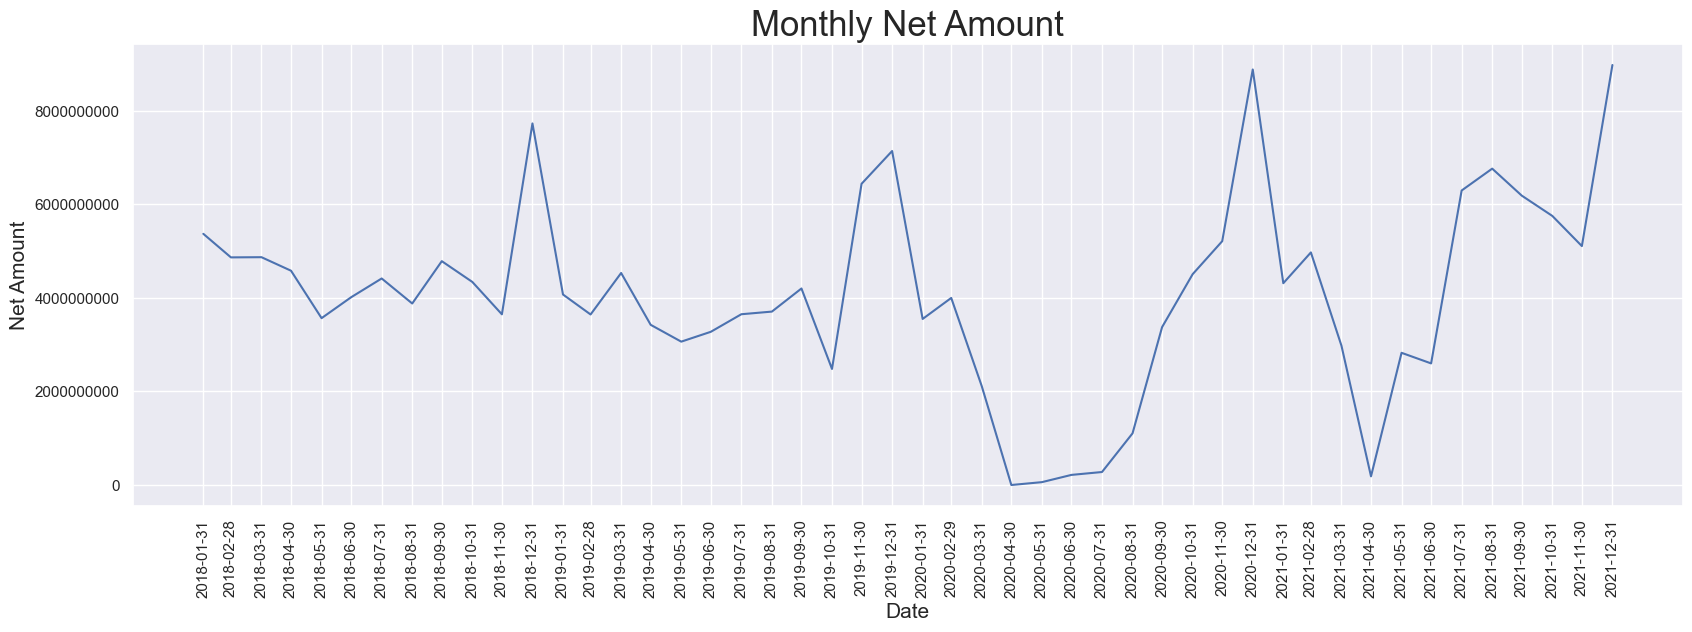

In [19]:
plt.figure(figsize=(20,6))
sns.lineplot(x=df_month.index, y=df_month['net_amount'])
plt.title('Monthly Net Amount', fontsize=25)

plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Net Amount', fontsize=15)

plt.xlabel('Date', fontsize=15)
plt.xticks(ticks=df_month.index, rotation=90)
plt.show()

### All Stores 'net_amount' by Day

In [23]:
# Filter Date and Net Amount, then group (Sum) by Date (Day) 
df_day = df[['date', 'net_amount']].groupby(pd.Grouper(key= 'date', freq='D')).sum().reset_index()

In [21]:
df_day.head()

date     net_amount 
0 2018-01-02 211651799.00
1 2018-01-03 192176102.00
2 2018-01-04 205290820.00
3 2018-01-05 203690552.00
4 2018-01-06 253437249.00

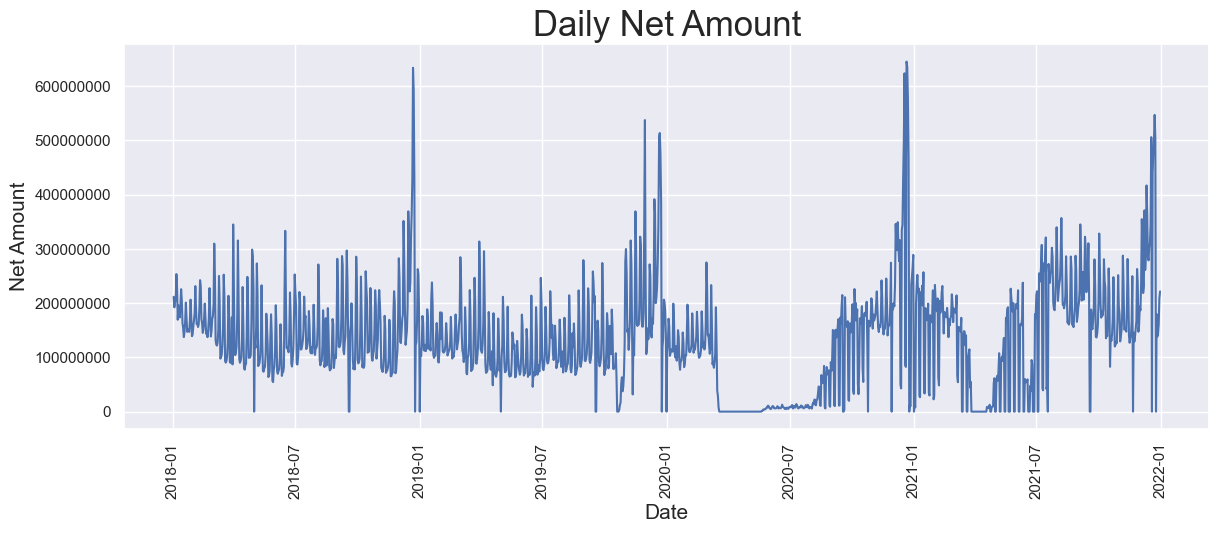

In [22]:
plt.figure(figsize=(14,5))
sns.lineplot(x='date', y='net_amount', data= df_day)
plt.title('Daily Net Amount', fontsize=25)

plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Net Amount', fontsize=15)

plt.xlabel('Date', fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Filtering Out the COVID Event

In [35]:
# Filtering Out the COVID Event
df_no_covid = df_month[(df_month.index < '2020-04-30') | (df_month.index > '2020-08-31')]
df_no_covid

net_amount 
date                    
2018-01-31 5370389293.00
2018-02-28 4866856684.00
2018-03-31 4870822254.00
2018-04-30 4581535920.00
2018-05-31 3567313725.00
2018-06-30 4014537551.00
2018-07-31 4415839587.00
2018-08-31 3880818799.00
2018-09-30 4785892552.00
2018-10-31 4341642567.00
2018-11-30 3649487949.00
2018-12-31 7730660459.00
2019-01-31 4072905576.00
2019-02-28 3645964186.00
2019-03-31 4533252012.00
2019-04-30 3424723612.00
2019-05-31 3065112239.00
2019-06-30 3275503981.00
2019-07-31 3651192143.00
2019-08-31 3707659492.00
2019-09-30 4201674144.00
2019-10-31 2481415238.00
2019-11-30 6440221696.00
2019-12-31 7140819922.00
2020-01-31 3550445650.00
2020-02-29 3999589890.00
2020-03-31 2112108077.00
2020-09-30 3376335024.00
2020-10-31 4507319478.00
2020-11-30 5213103367.00
2020-12-31 8883932601.00
2021-01-31 4314567692.00
2021-02-28 4972850497.00
2021-03-31 2979353351.00
2021-04-30  185123515.00
2021-05-31 2826339551.00
2021-06-30 2599815154.00
2021-07-31 6296917130.00
2021-08-31 6764375204.00
2021-09-30 6187094345.00
2021-10-31 5753443517.00
2021-11-30 5108418504.00
2021-12-31 8980231308.00

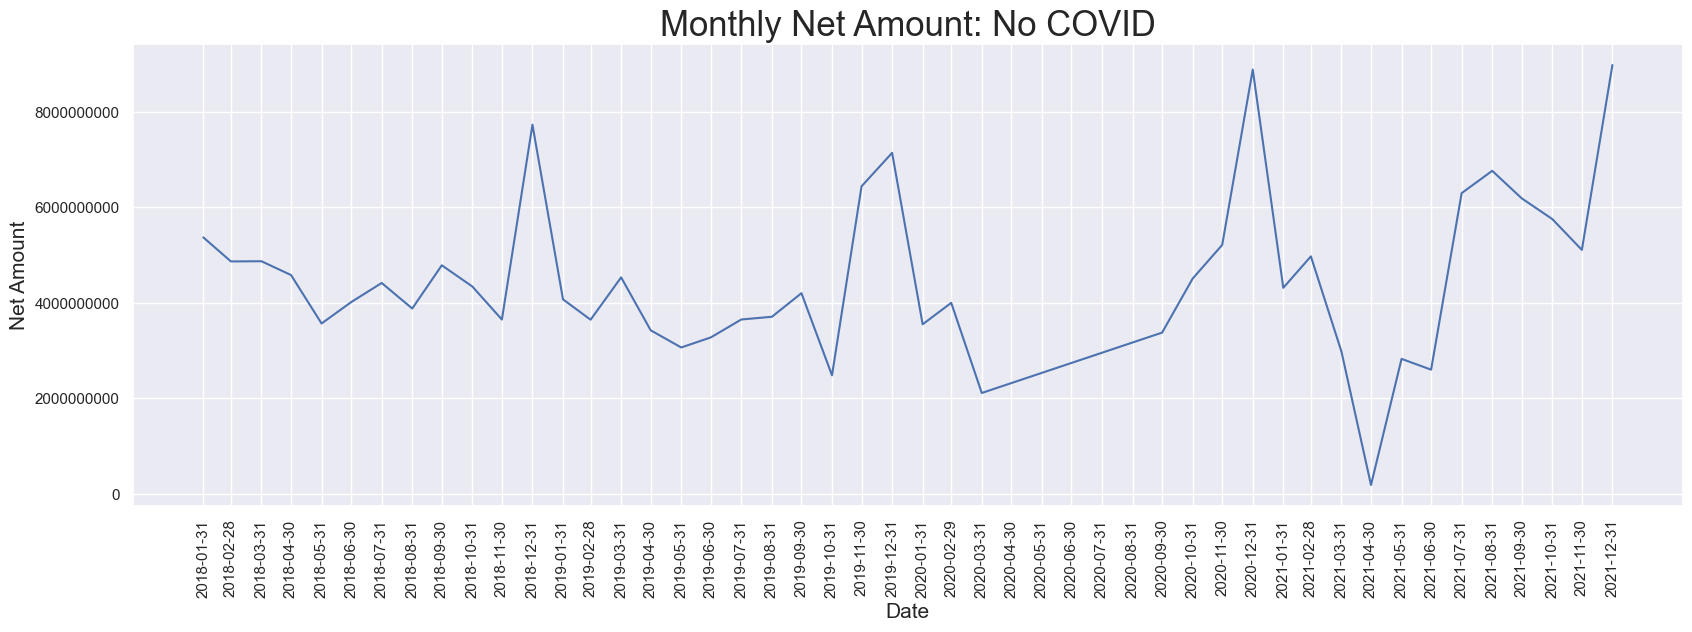

In [36]:
plt.figure(figsize=(20,6))
sns.lineplot(x=df_no_covid.index, y=df_no_covid['net_amount'])
plt.title('Monthly Net Amount: No COVID', fontsize=25)

plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Net Amount', fontsize=15)

plt.xlabel('Date', fontsize=15)
plt.xticks(ticks=df_month.index, rotation=90)
plt.show()

### Each Store 'net_amount' by Month 

In [27]:
df_per_store = df.groupby(by=['store_id', pd.Grouper(key= 'date', freq='ME')]).sum()

In [28]:
df_per_store

pos_id                        \
store_id date                                                            
*CL905   2018-10-31                                            CL90502   
CL104    2018-01-31  CL10401CL10401CL10401CL10401CL10401CL10401CL10...   
         2018-02-28  CL10401CL10401CL10401CL10401CL10401CL10401CL10...   
         2018-03-31  CL10401CL10401CL10401CL10401CL10401CL10401CL10...   
         2018-04-30  CL10401CL10401CL10401CL10401CL10401CL10401CL10...   
...                                                                ...   
CL912    2020-12-31  CL91202CL91202CL91202CL91202CL91202CL91202CL91...   
CL914    2021-05-31  CL91402CL91402CL91402CL91402CL91402CL91402CL91...   
         2021-06-30  CL91402CL91402CL91402CL91402CL91402CL91402CL91...   
         2021-07-31  CL91402CL91402CL91402CL91402CL91402CL91402CL91...   
         2021-08-31  CL91402CL91402CL91402CL91402CL91402CL91402CL91...   

                     transaction_id  net_amount   \
store_id date                                      
*CL905   2018-10-31           774       21373.00   
CL104    2018-01-31    3987880654   215077154.00   
         2018-02-28    2739395651   172819310.00   
         2018-03-31    1381404541   114069808.00   
         2018-04-30    1300697148   111274459.00   
...                             ...          ...   
CL912    2020-12-31      22964877    78857365.00   
CL914    2021-05-31      10840998   240104982.00   
         2021-06-30      23203257   162413378.00   
         2021-07-31      96953338   336226308.00   
         2021-08-31      31946063    82288340.00   

                                         item_id                        
store_id date                                                           
*CL905   2018-10-31                                             DA9099  
CL104    2018-01-31  BY1610BA8899BA8899BQ0759BQ4533S80993BB3239BQ96...  
         2018-02-28  AA2287CV4555CF6257BK6134CE1931BK6134AA2286BY26...  
         2018-03-31  CQ1814CF7348CF7358BK0796BK0969BK0961CW3436BQ72...  
         2018-04-30  CM7702B32703AA2279S88113CE6614CM8122CQ2865CG40...  
...                                                                ...  
CL912    2020-12-31  CF3678FM0610FM0610DN8765EG6049FL0225FP9137FK64...  
CL914    2021-05-31  DZ9401DZ9401DV2428EG9824GN8205GJ6489GN3555GJ64...  
         2021-06-30  GJ6490GJ6490FS0705DU0445DZ9401GK9221GL3447FT85...  
         2021-07-31  GL0343DZ9357FQ4707FU0036EY3709S49975FU7712FX14...  
         2021-08-31  FS0409GN2991FJ9353S49975FW5072EG9824EY3727S499...  

[2102 rows x 4 columns]

In [29]:
df_per_store.reset_index(inplace=True)

In [31]:
df_per_store.sort_values(by='date', ascending=False)['store_id'].unique()

array(['CL172', 'CL142', 'CL310', 'CL115', 'CL312', 'CL149', 'CL119',
       'CL124', 'CL317', 'CL186', 'CL153', 'CL105', 'CL173', 'CL184',
       'CL179', 'CL314', 'CL137', 'CL305', 'CL135', 'CL311', 'CL123',
       'CL158', 'CL111', 'CL154', 'CL308', 'CL307', 'CL148', 'CL313',
       'CL159', 'CL156', 'CL136', 'CL202', 'CL155', 'CL131', 'CL315',
       'CL118', 'CL145', 'CL910', 'CL171', 'CL121', 'CL157', 'CL187',
       'CL151', 'CL306', 'CL152', 'CL141', 'CL914', 'CL144', 'CL185',
       'CL302', 'CL180', 'CL907', 'CL911', 'CL178', 'CL912', 'CL128',
       'CL182', 'CL143', 'CL909', 'CL908', 'CL125', 'CL901', 'CL104',
       'CL117', 'CL904', 'CL132', 'CL905', 'CL150', 'CL177', 'CL120',
       'CL906', 'CL146', 'CL126', '*CL905', 'CL113', 'CL139', 'CL903',
       'CL112'], dtype=object)

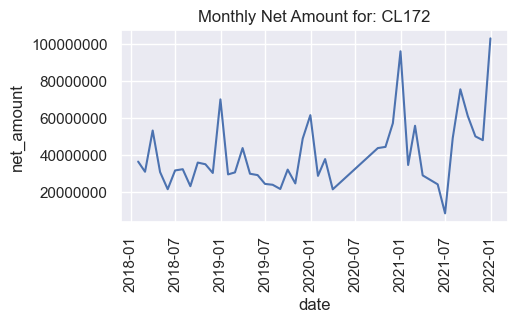

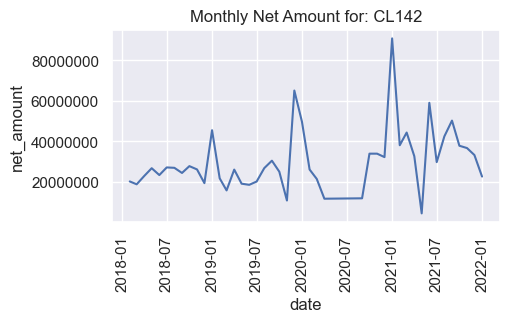

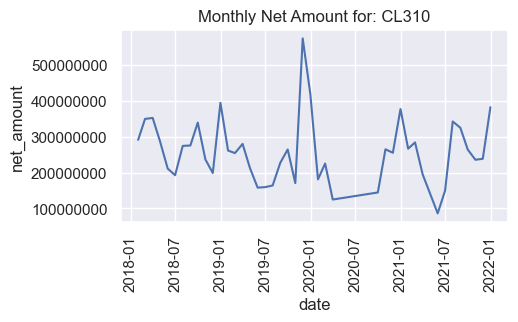

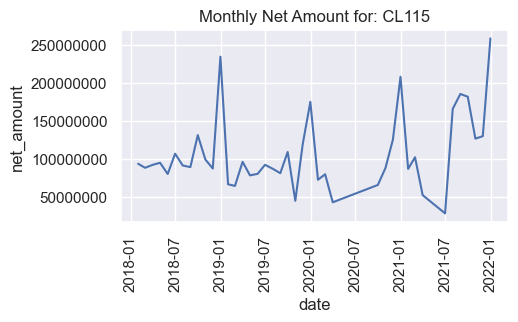

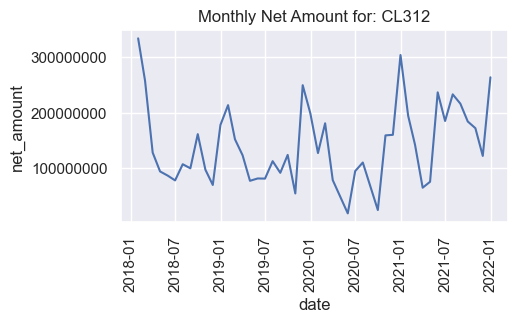

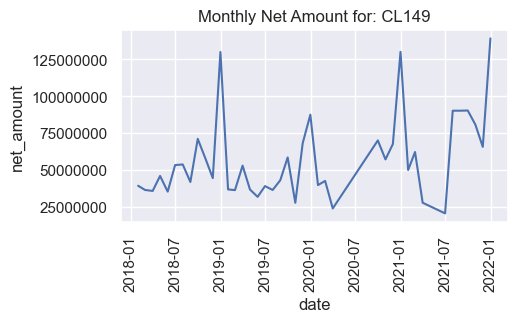

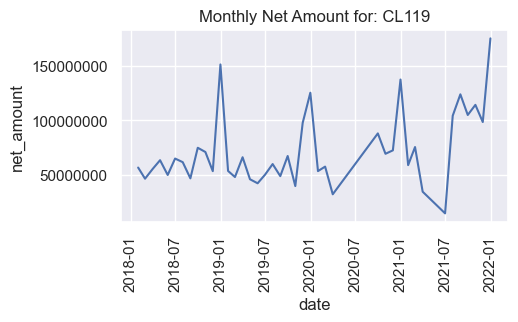

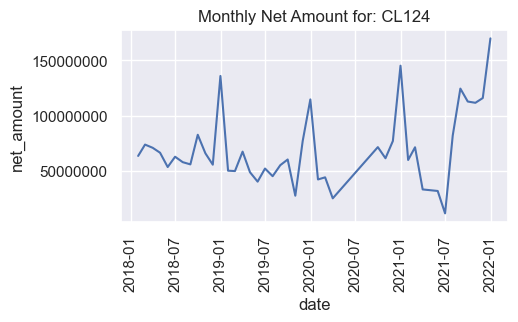

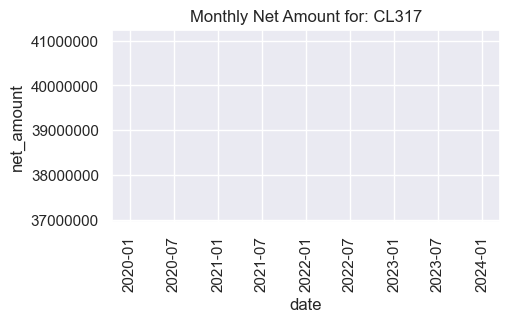

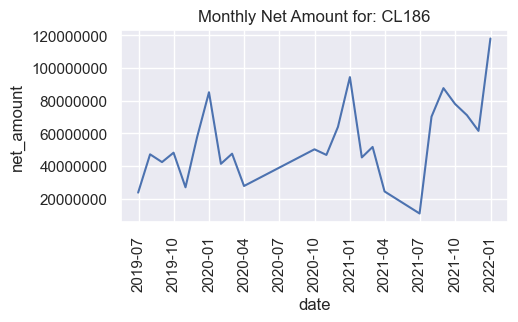

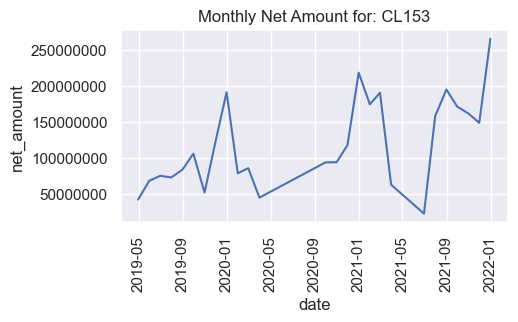

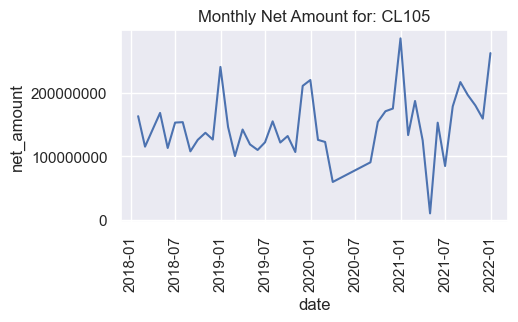

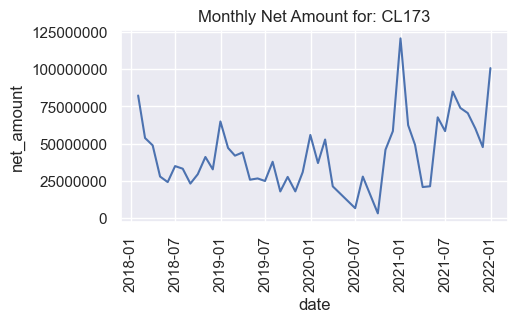

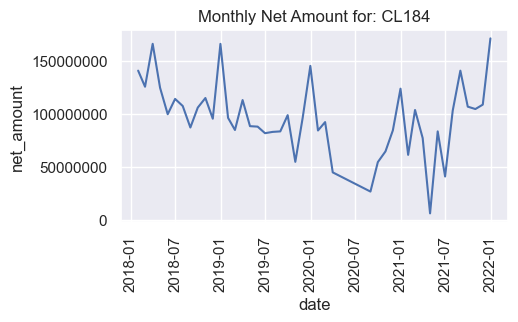

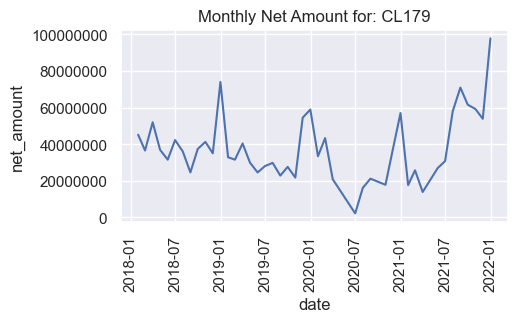

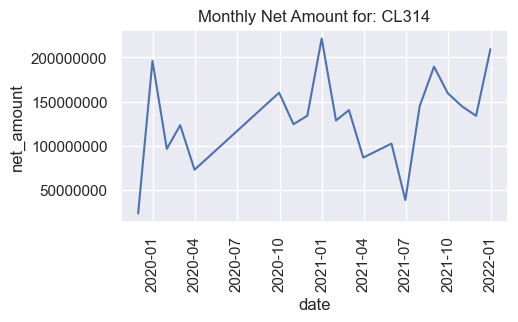

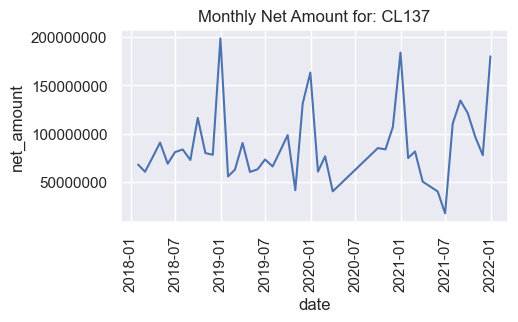

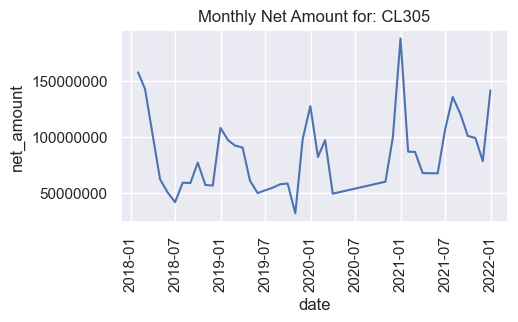

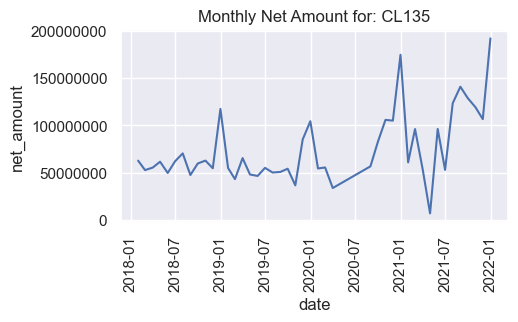

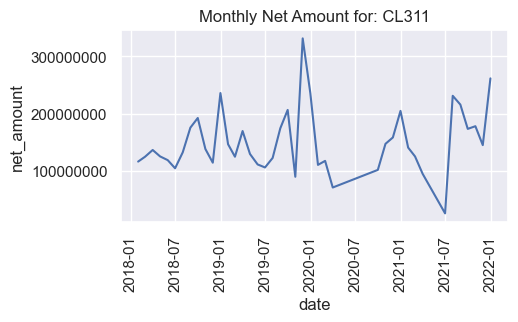

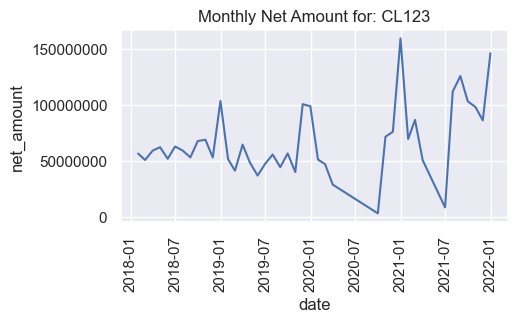

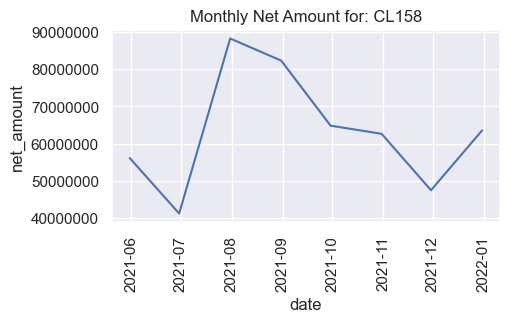

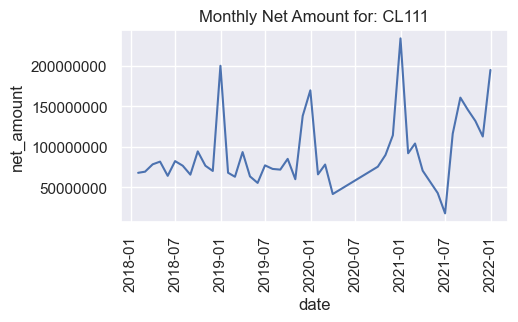

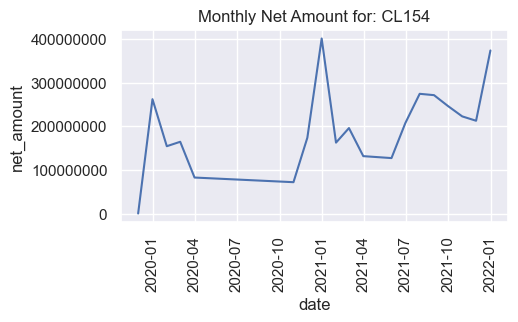

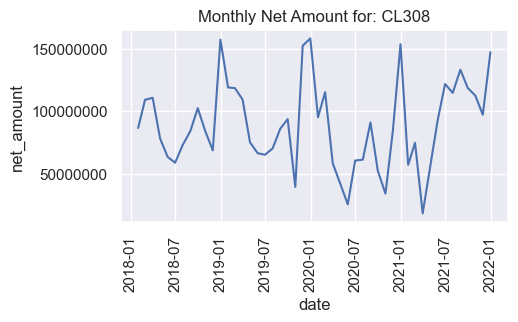

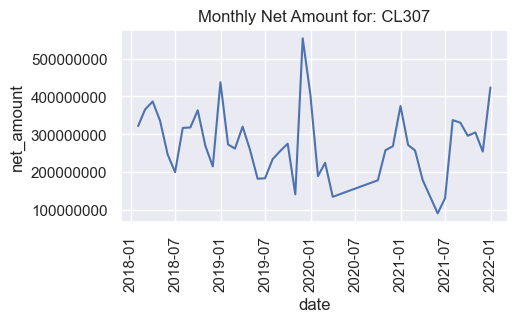

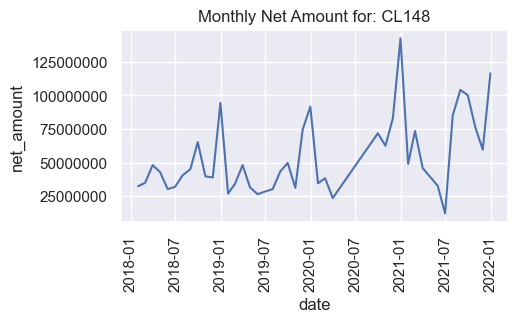

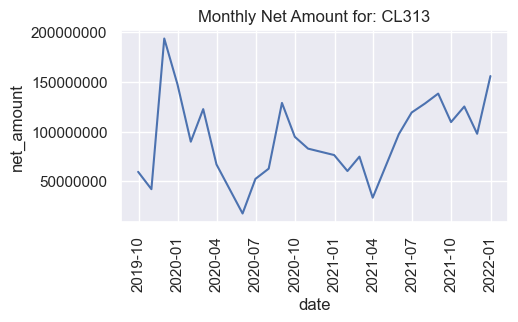

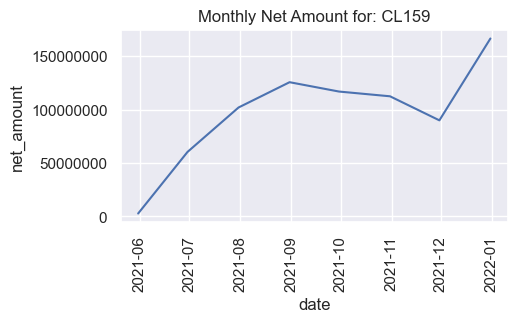

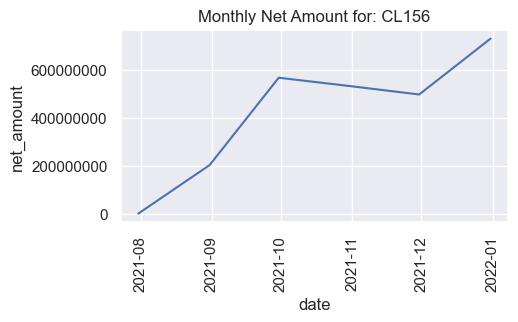

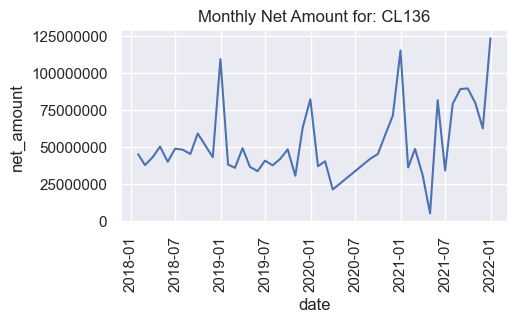

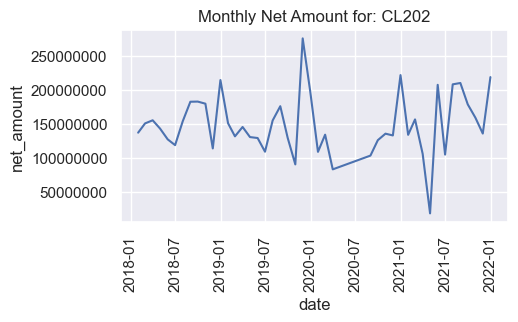

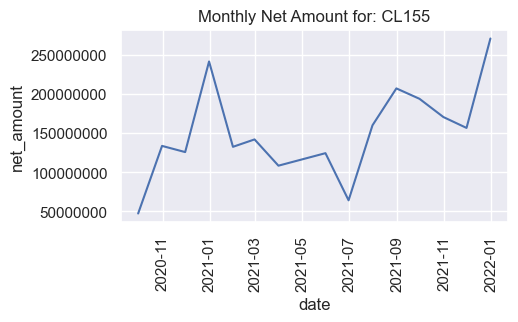

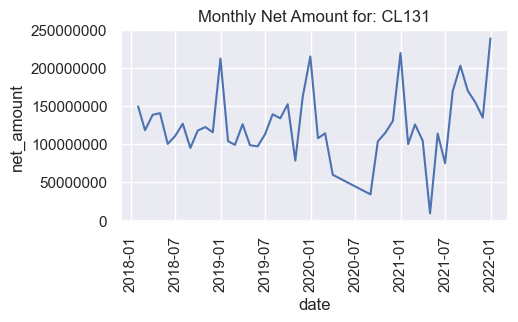

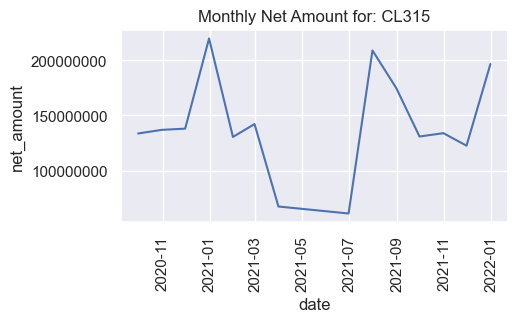

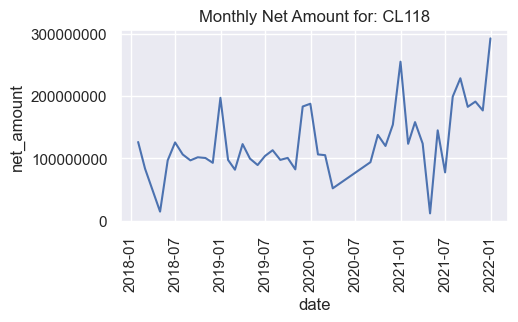

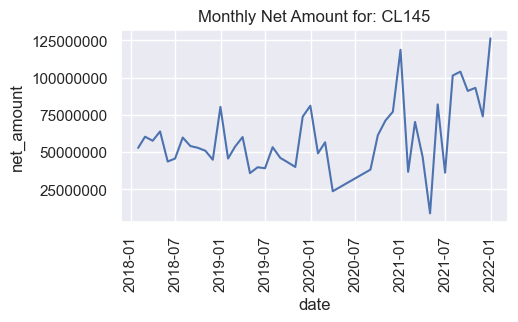

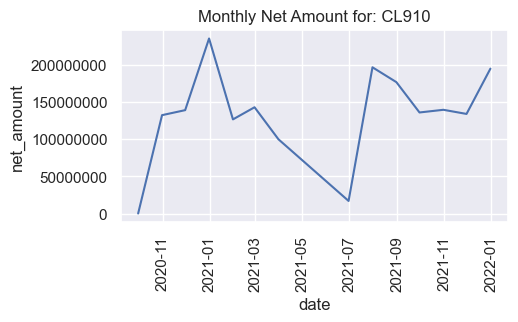

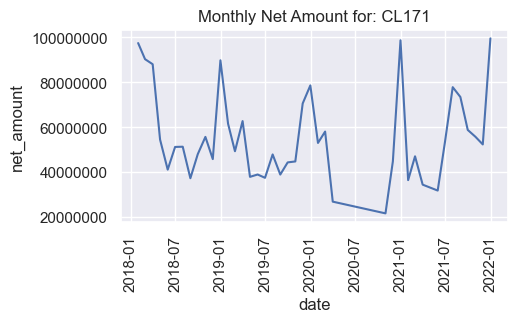

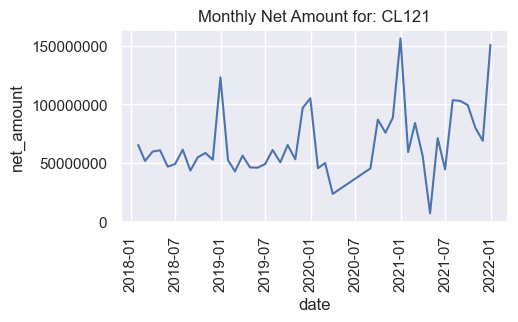

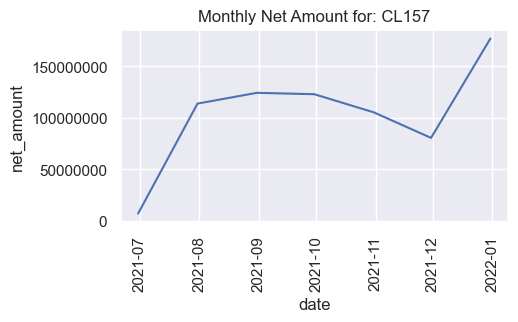

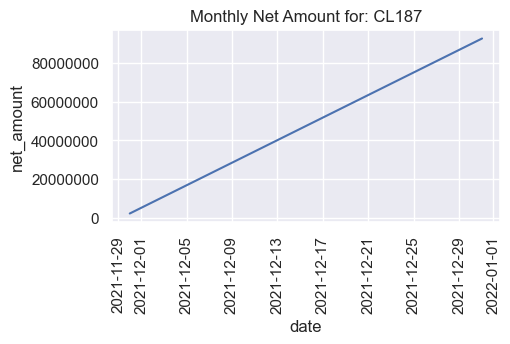

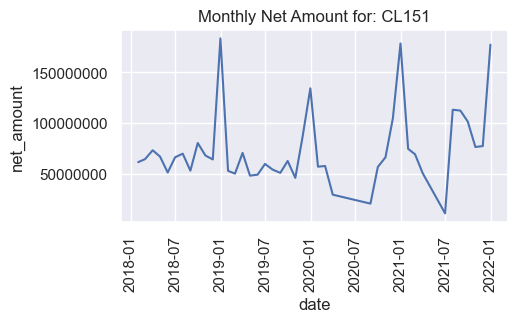

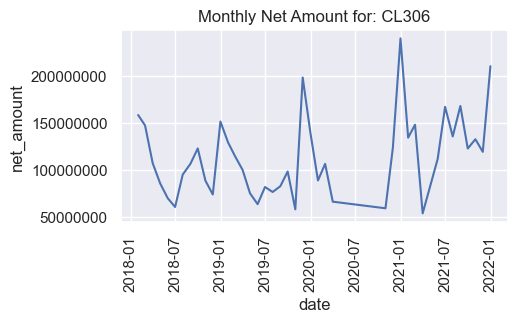

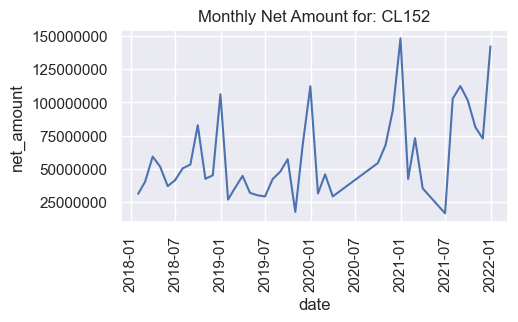

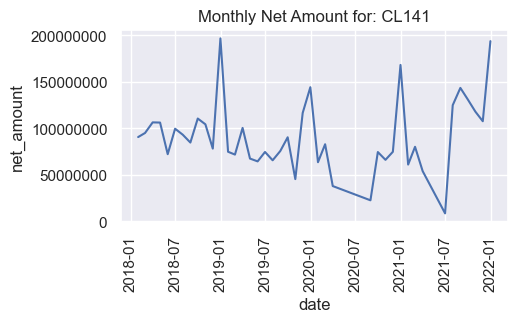

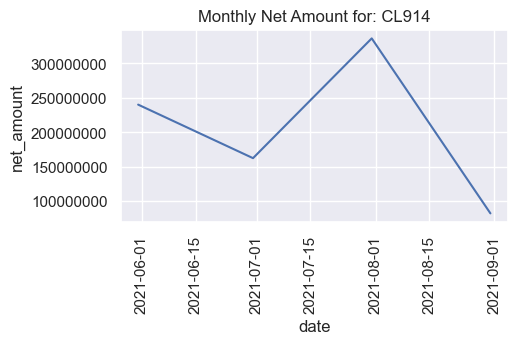

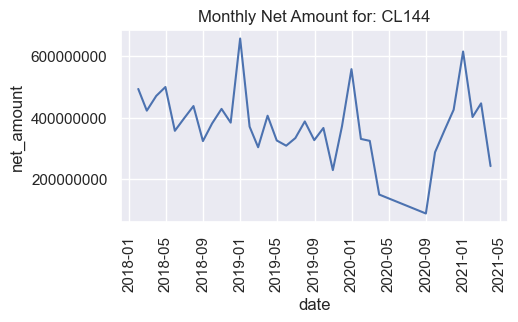

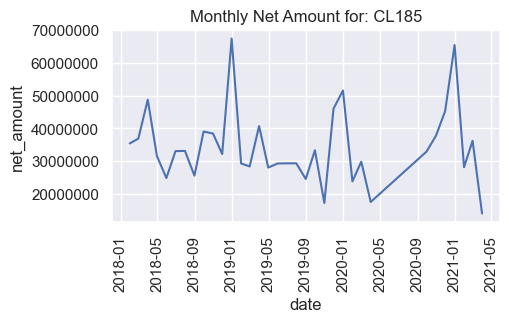

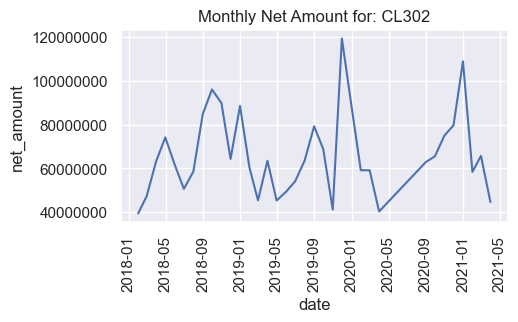

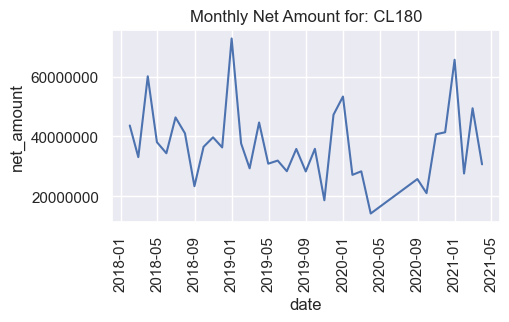

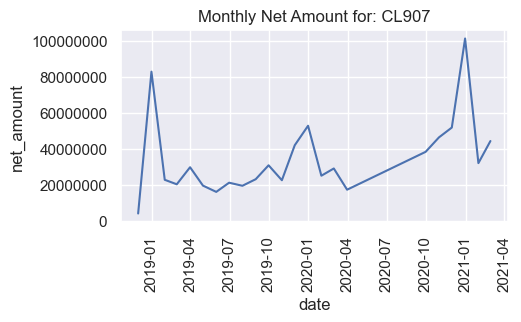

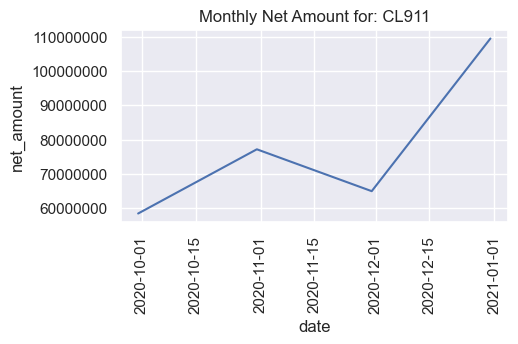

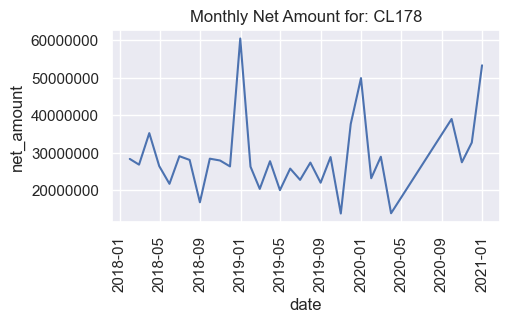

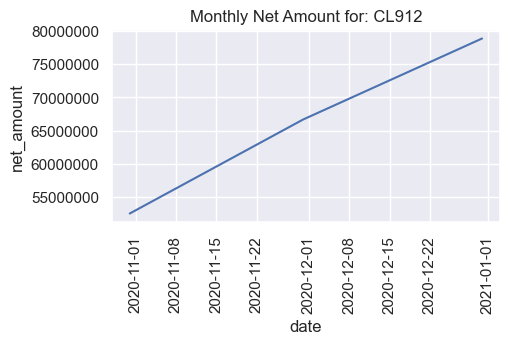

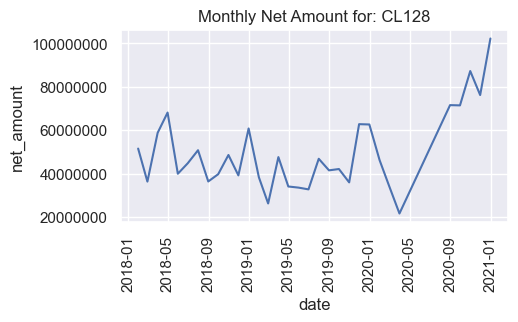

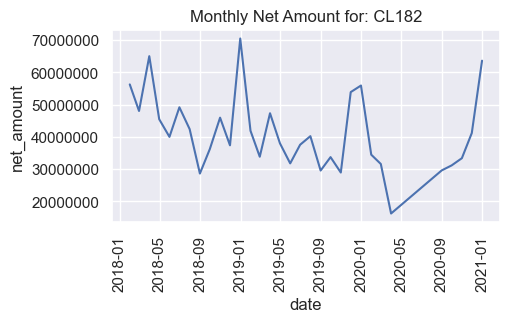

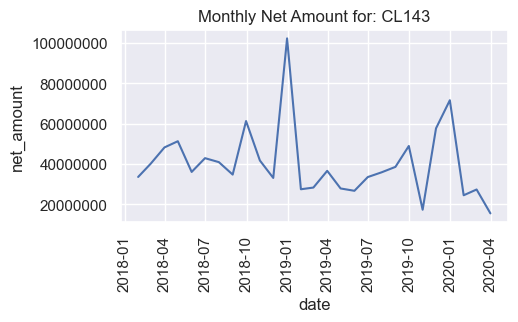

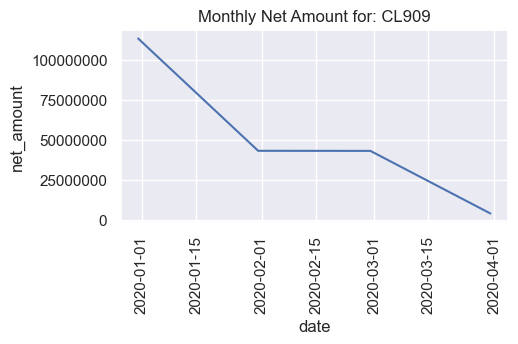

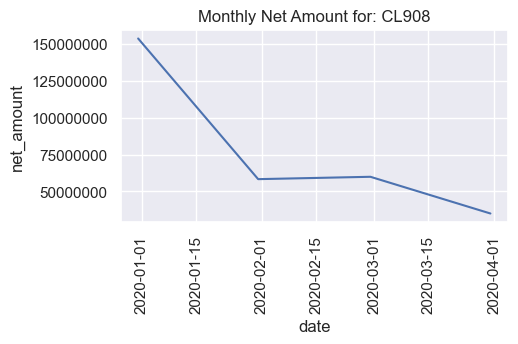

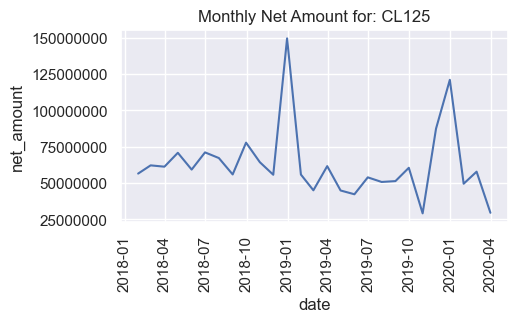

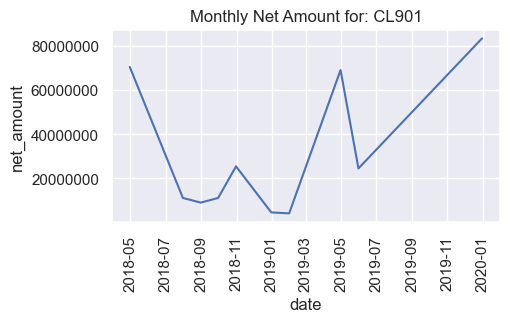

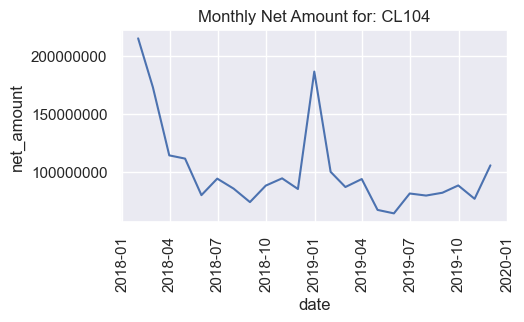

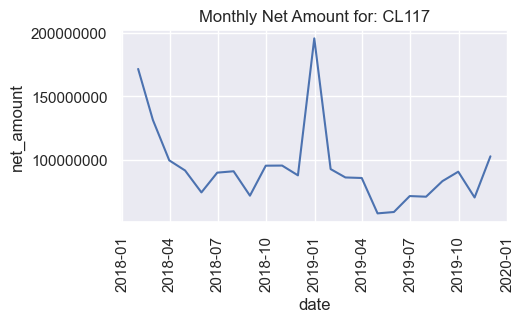

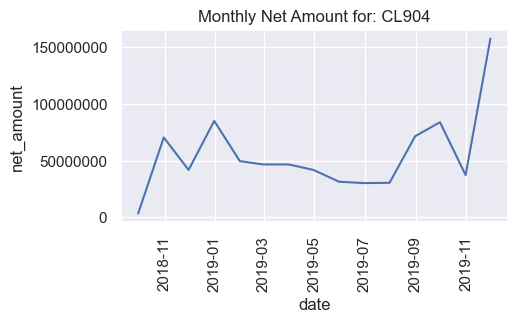

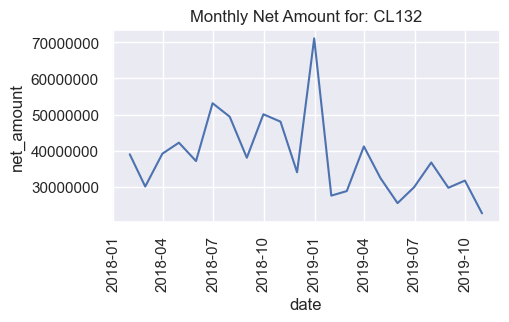

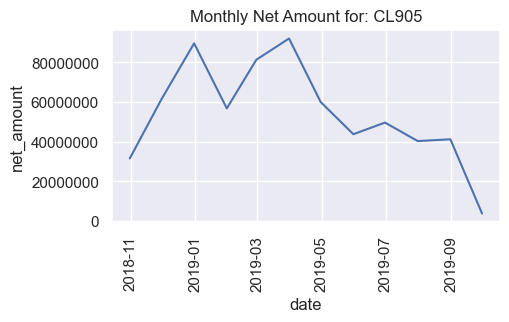

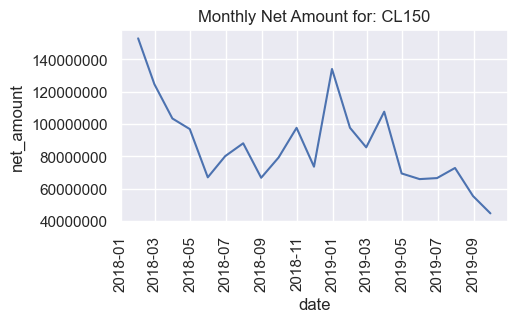

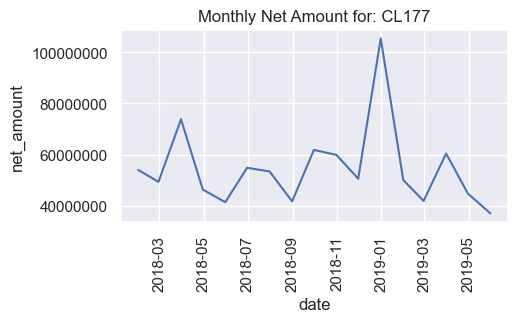

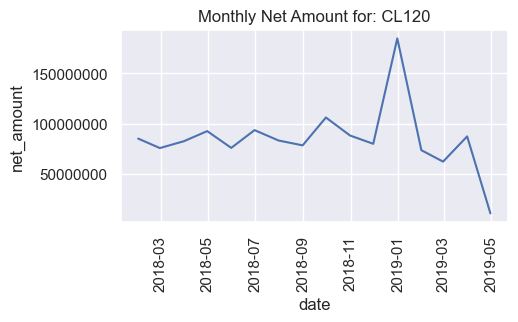

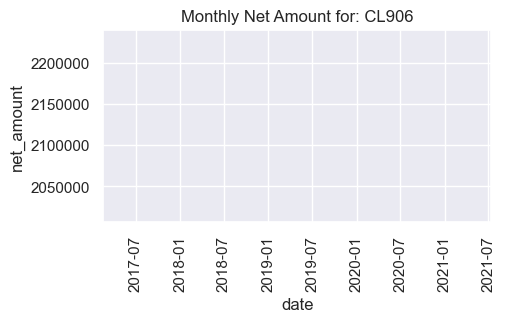

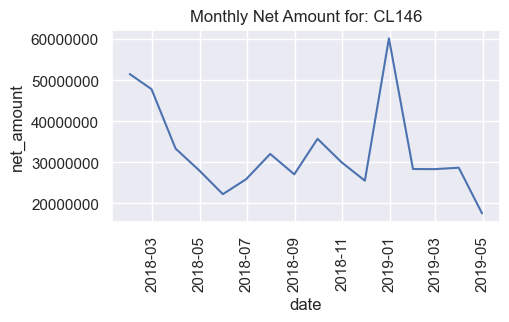

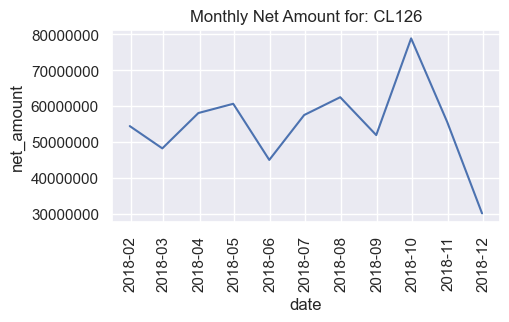

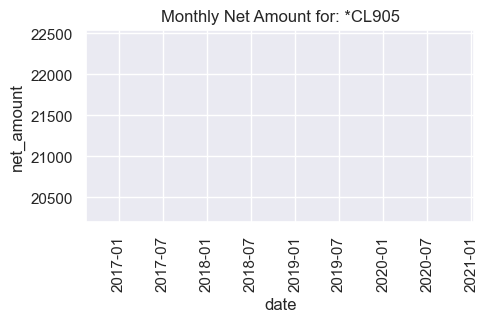

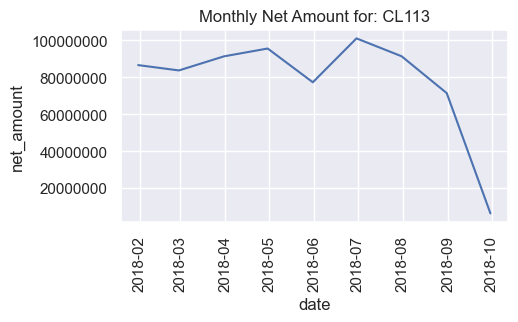

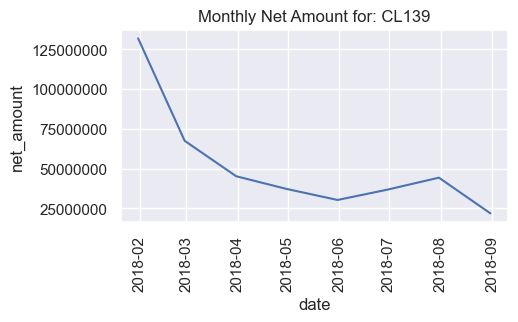

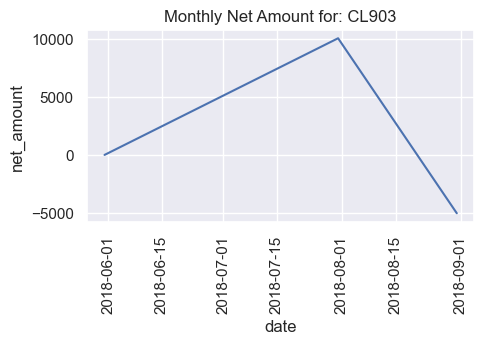

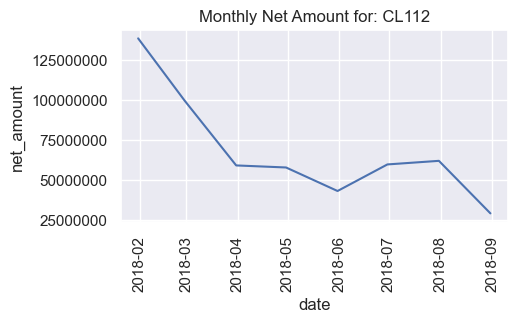

In [34]:
# Sorted by Active Stores (Descending)
for store_iter in df_per_store.sort_values(by='date', ascending=False)['store_id'].unique(): 
  plt.figure(figsize=(5,2.5))
  sns.lineplot(x='date', y='net_amount', data= df_per_store[df_per_store.store_id == store_iter], legend=None)
  plt.title('Monthly Net Amount for: ' + store_iter)
  plt.xticks(rotation=90)
  plt.ticklabel_format(style='plain', axis='y')    #Remove Scientific Notation
  plt.show()

## Daily 'net_amount' Distribution for Outliers Detection

In [ ]:
net_amount = df['net_amount']

### Method #1

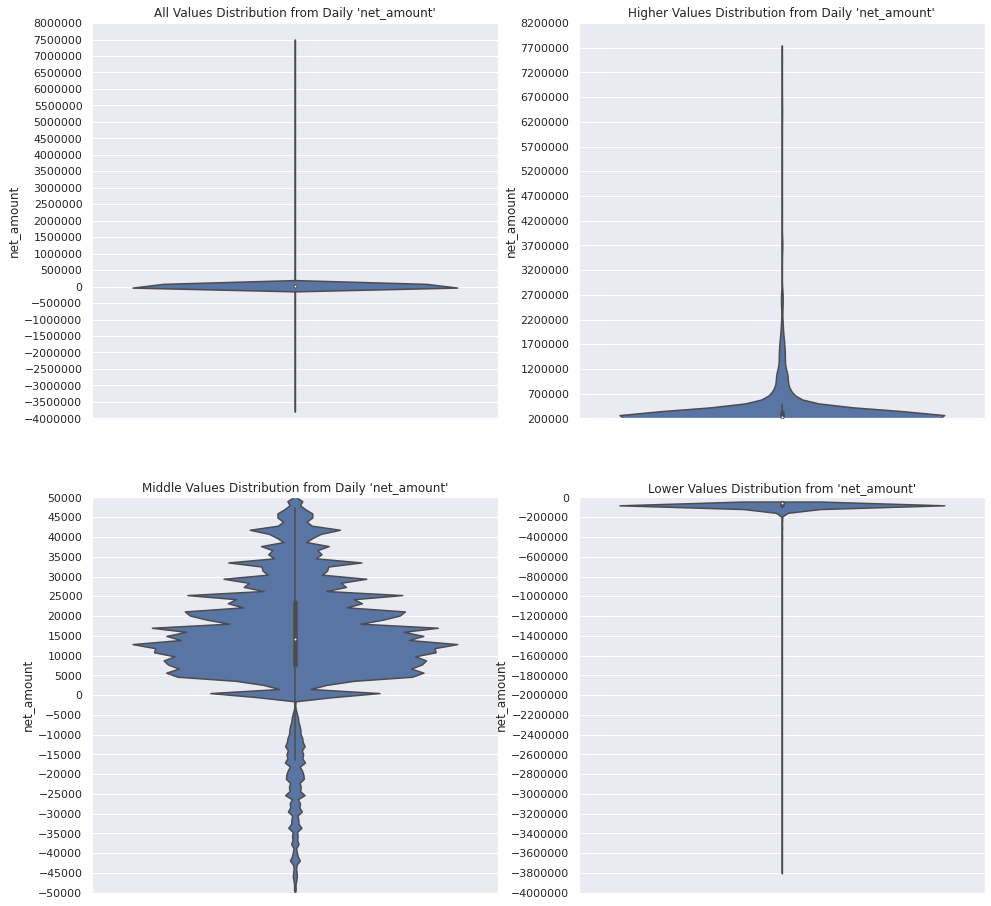

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(16,16))

#1 - All values from 'net_amount'
sns.violinplot(ax=axs[0,0] , y=net_amount)
axs[0,0].set_title("All Values Distribution from Daily 'net_amount'")
axs[0,0].ticklabel_format(style='plain', axis='y')    #Remove Scientific Notation
axs[0,0].set_ylim(-4000000,8000000)
axs[0,0].set_yticks(range(-4000000,8500000, 500000))
    
#2 - Top values from 'net_amount'
bottom_range = 200000
top_range = 8200000
step = 500000 

sns.violinplot(ax=axs[0,1] , y= net_amount[(net_amount > bottom_range) & (net_amount < top_range)])
axs[0,1].set_title("Higher Values Distribution from Daily 'net_amount'")
axs[0,1].ticklabel_format(style='plain', axis='y')
axs[0,1].set_ylim(bottom_range, top_range)
axs[0,1].set_yticks(range(bottom_range, top_range+step, step))

#3 - Middle values from 'net_amount'
bottom_range = -50000
top_range = 50000
step = 5000

sns.violinplot(ax=axs[1,0] , y= net_amount[(net_amount > bottom_range) & (net_amount < top_range)])
axs[1,0].set_title("Middle Values Distribution from Daily 'net_amount'")
axs[1,0].ticklabel_format(style='plain', axis='y')
axs[1,0].set_ylim(bottom_range, top_range)
axs[1,0].set_yticks(range(bottom_range, top_range+step, step))

#4 - Bottom values from 'net_amount'
bottom_range = -4000000
top_range = -50000
step = 200000 

sns.violinplot(ax=axs[1,1] , y= net_amount[(net_amount > bottom_range) & (net_amount < top_range)])
axs[1,1].set_title("Lower Values Distribution from 'net_amount'")
axs[1,1].ticklabel_format(style='plain', axis='y')
axs[1,1].set_ylim(bottom_range, top_range)
axs[1,1].set_yticks(range(bottom_range, top_range+step, step))

plt.show()

### Method #2

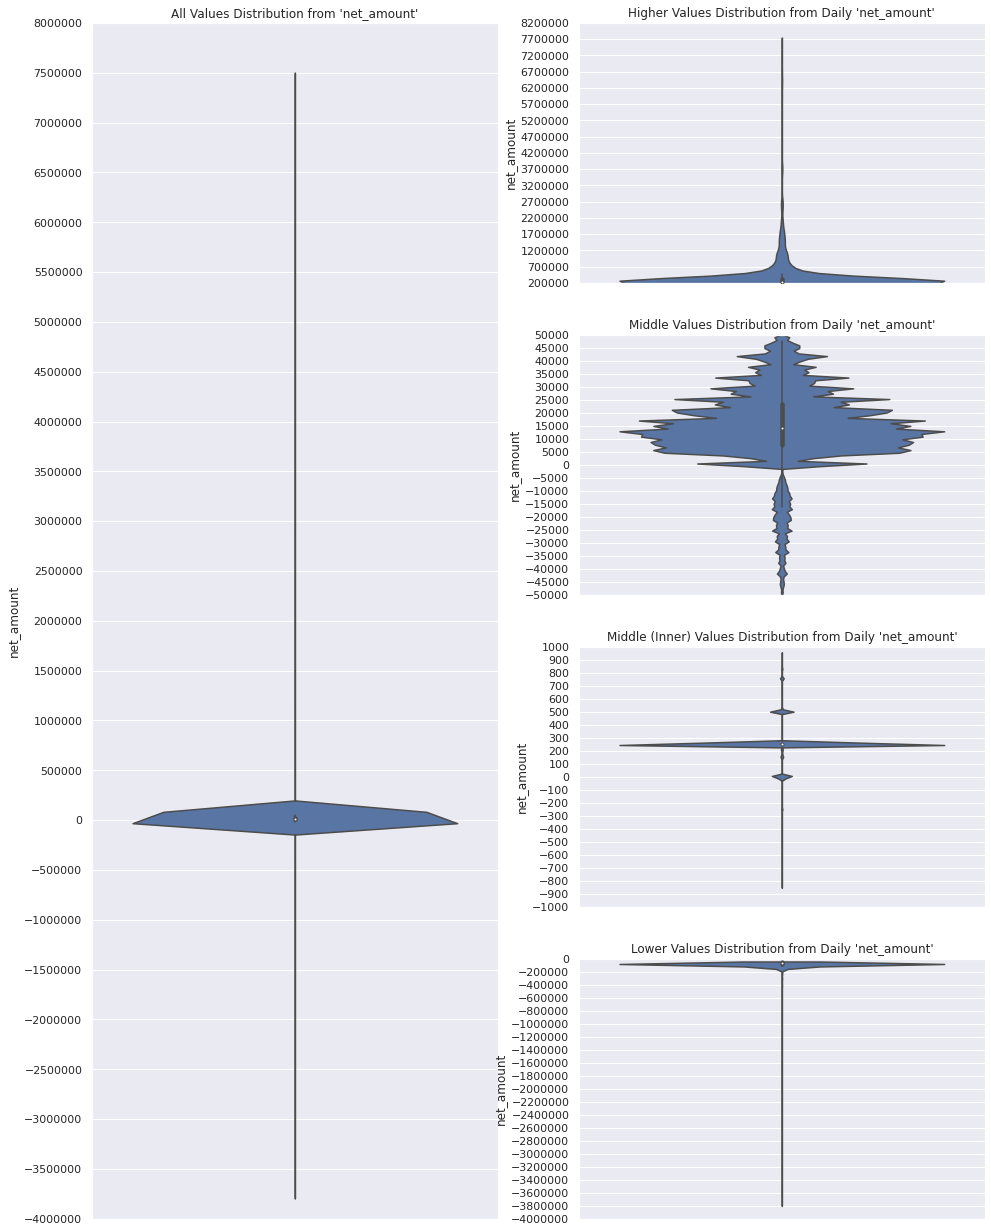

In [ ]:
fig = plt.figure(figsize=(16,22))

ax1 = fig.add_subplot(121) 
ax2 = fig.add_subplot(422)   
ax3 = fig.add_subplot(424)
ax4 = fig.add_subplot(426)   
ax5 = fig.add_subplot(428)

#1 - All values from 'net_amount'
bottom_range = -4000000
top_range = 8000000
step = 500000

sns.violinplot(ax=ax1 , y=net_amount)
ax1.set_title("All Values Distribution from 'net_amount'")
ax1.ticklabel_format(style='plain', axis='y')    #Remove Scientific Notation
ax1.set_ylim(bottom_range, top_range)
ax1.set_yticks(range(bottom_range, top_range+step, step))
    
#2 - Top values from 'net_amount'
bottom_range = 200000
top_range = 8200000
step = 500000 

sns.violinplot(ax=ax2 , y= net_amount[(net_amount > bottom_range) & (net_amount < top_range)])
ax2.set_title("Higher Values Distribution from Daily 'net_amount'")
ax2.ticklabel_format(style='plain', axis='y')
ax2.set_ylim(bottom_range, top_range)
ax2.set_yticks(range(bottom_range, top_range+step, step))

#3 - Middle values from 'net_amount'
bottom_range = -50000
top_range = 50000
step = 5000

sns.violinplot(ax=ax3 , y= net_amount[(net_amount > bottom_range) & (net_amount < top_range)])
ax3.set_title("Middle Values Distribution from Daily 'net_amount'")
ax3.ticklabel_format(style='plain', axis='y')
ax3.set_ylim(bottom_range, top_range)
ax3.set_yticks(range(bottom_range, top_range+step, step))

#4 - Middle (Inner) values from 'net_amount'
bottom_range = -1000
top_range = 1000
step = 100

sns.violinplot(ax=ax4 , y= net_amount[(net_amount > bottom_range) & (net_amount < top_range)])
ax4.set_title("Middle (Inner) Values Distribution from Daily 'net_amount'")
ax4.ticklabel_format(style='plain', axis='y')
ax4.set_ylim(bottom_range, top_range)
ax4.set_yticks(range(bottom_range, top_range+step, step))

#5 - Bottom values from 'net_amount'
bottom_range = -4000000
top_range = -50000
step = 200000 

sns.violinplot(ax=ax5 , y= net_amount[(net_amount > bottom_range) & (net_amount < top_range)])
ax5.set_title("Lower Values Distribution from Daily 'net_amount'")
ax5.ticklabel_format(style='plain', axis='y')
ax5.set_ylim(bottom_range, top_range)
ax5.set_yticks(range(bottom_range, top_range+step, step))

plt.show()

## Daily 'net_amount' per Store Distribution for Outliers Detection

In [ ]:
net_amount_stores = df[['net_amount','store']].sort_values(by='net_amount', ascending=False)

In [ ]:
net_amount_stores 

net_amount store 
6337910     7499500   CL901
10703010    6718487   CL105
6779857     6428143   CL901
6337911     6428143   CL901
6337909     6213871   CL901
...              ...    ...
92373      -1560035   CL111
105105     -2073929   CL111
92386      -2073929   CL111
92379      -2422644   CL111
7458035    -3794529   CL312

[11793728 rows x 2 columns]

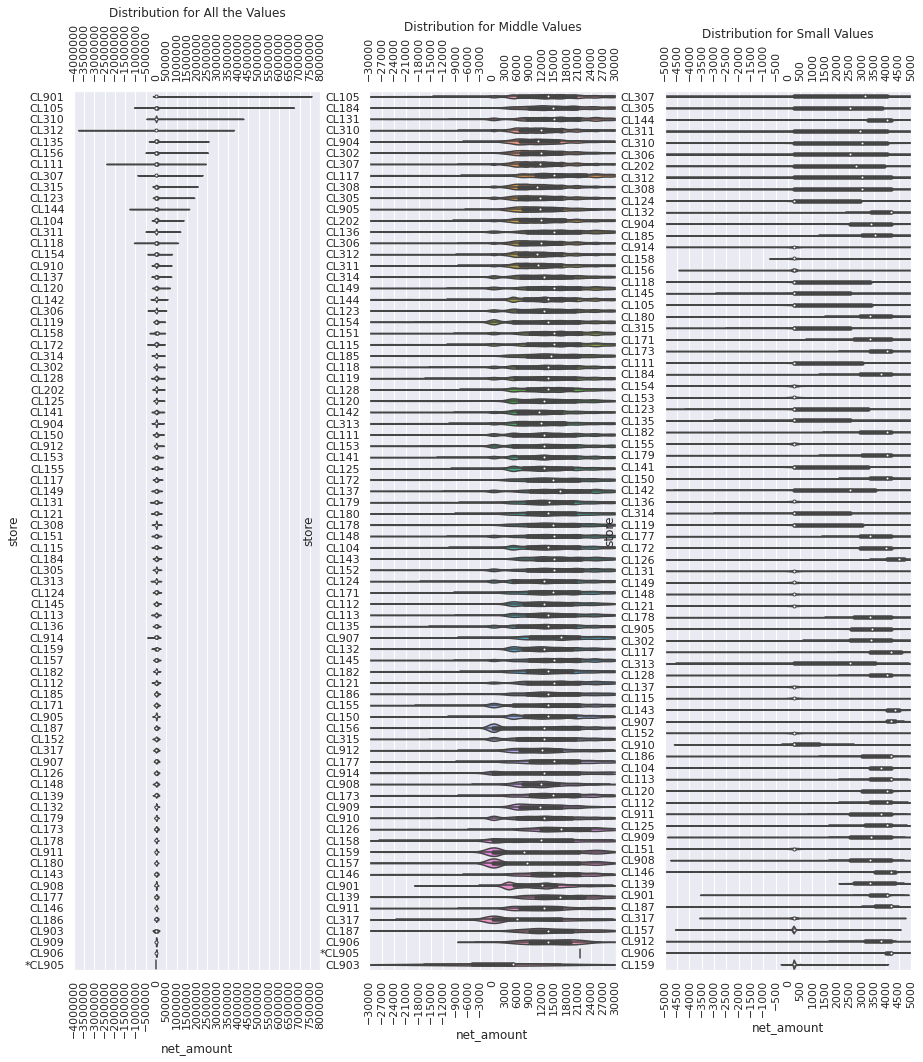

In [ ]:
# Distribution of Daily "net_amount" for All Stores in Different Ranges

from matplotlib import axis
fig = plt.figure(figsize=(15,55))

ax1 = fig.add_subplot(331) 
ax2 = fig.add_subplot(332)   
ax3 = fig.add_subplot(333)  

# Big Picture - (No Zoom)
bottom_range = -4000000
top_range = 8000000
step = 500000

sns.violinplot(y='store', x='net_amount', data= net_amount_stores , ax=ax1) 
ax1.set_title('Distribution for All the Values')
ax1.ticklabel_format(style='plain', axis='x') #Remove Scientific Notation
ax1.set_xlim(bottom_range, top_range)
ax1.set_xticks(range(bottom_range, top_range+step, step))
ax1.tick_params(axis='x', labelrotation=90, labeltop=True)

# Medium Picture (Zooming to check the Distribution for Middle Values)
bottom_range = -30000
top_range = 30000
step = 3000

sns.violinplot(y='store', x='net_amount', ax=ax2, data= net_amount_stores[(net_amount_stores['net_amount'] >= bottom_range) & (net_amount_stores['net_amount'] <= top_range)]) 
ax2.set_title('Distribution for Middle Values')
ax2.ticklabel_format(style='plain', axis='x') #Remove Scientific Notation
ax2.set_xlim(bottom_range, top_range)
ax2.set_xticks(range(bottom_range, top_range+step, step))
ax2.tick_params(axis='x', labelrotation=90, labeltop=True)

# Small Picture (Zooming to Check the Distribution for Small Values)
bottom_range = -5000
top_range = 5000
step = 500

sns.violinplot(y='store', x='net_amount', ax=ax3, data= net_amount_stores[(net_amount_stores['net_amount'] >= bottom_range) & (net_amount_stores['net_amount'] <= top_range)]) 
ax3.set_title('Distribution for Small Values')
ax3.ticklabel_format(style='plain', axis='x') #Remove Scientific Notation
ax3.set_xlim(bottom_range, top_range)
ax3.set_xticks(range(bottom_range, top_range+step, step))
ax3.tick_params(axis='x', labelrotation=90, labeltop=True)

plt.show()

## Number of Open Stores by Date

In [ ]:
# Open Stores by Date
active_stores_date = df.groupby(pd.Grouper(key= 'date', freq='M'))['store'].nunique()

In [ ]:
active_stores_date.head()

date
2018-01-31    52
2018-02-28    52
2018-03-31    51
2018-04-30    53
2018-05-31    53
Freq: M, Name: store, dtype: int64

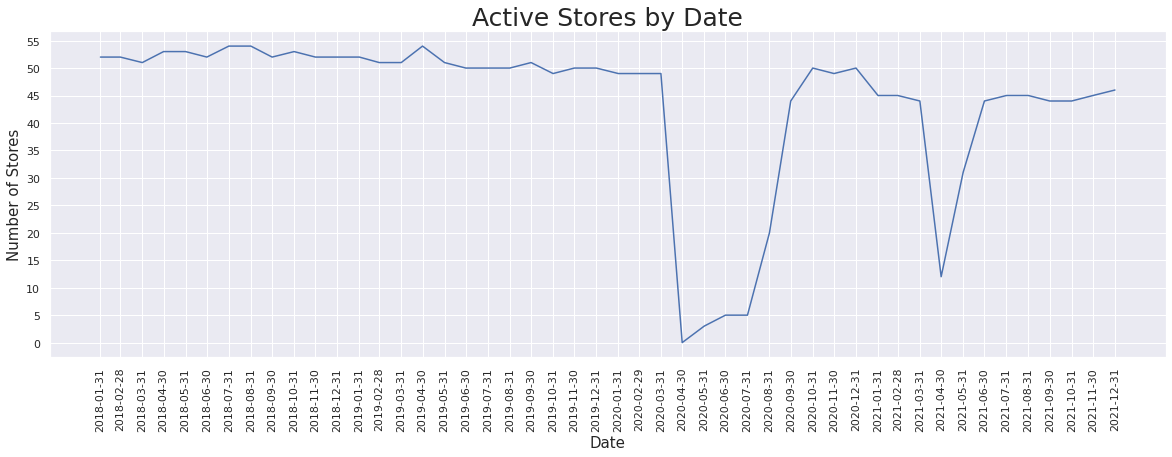

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(active_stores_date.index, active_stores_date)
plt.title('Active Stores by Date', fontsize=25)
#X Axis
plt.xlabel('Date', fontsize=15)
plt.xticks(ticks=active_stores_date.index, rotation=90)
#Y Axis
plt.ylabel('Number of Stores', fontsize=15)
plt.yticks(range(0,60, 5))

plt.show()

## Stores with Higher Sales (Net Amount)

In [ ]:
store_sales = df.groupby(['store'])[['net_amount']].agg('sum').sort_values(['net_amount'],ascending=False)

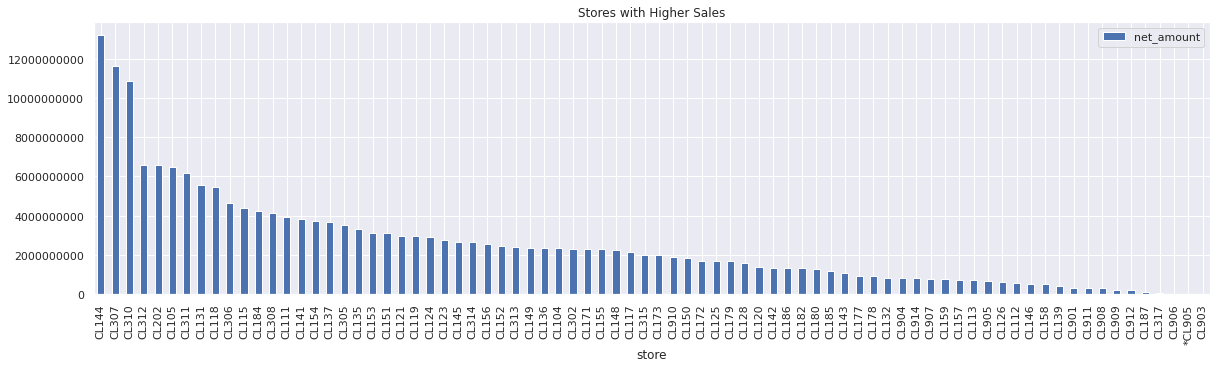

In [ ]:
store_sales.plot.bar(figsize=(20,5), title='Stores with Higher Sales')
plt.ticklabel_format(style='plain', axis='y')    #Remove Scientific Notation

# Modeling with Prophet

## Prophet Pre-Modeling

In [ ]:
df_prophet = df.copy()

In [ ]:
# Higher Outliers Values
qup = df['net_amount'].quantile(0.999995)

# Lower Outliers Values
qdown = df['net_amount'].quantile(0.000001)

In [ ]:
# Filters

#df_prophet = df_prophet[(df_prophet.date < '2020-03-14') | (df_prophet.date > '2020-08-13')]
#print (f'Shape After Filtering out COVID          : {df_prophet.shape}')

df_prophet = df_prophet[df_prophet.store != '*CL905']
print (f'Shape After Filtering out Store: *CL905  : {df_prophet.shape}')

#df_prophet = df_prophet[df_prophet.net_amount != 0]
#print (f"Shape After Filtering out 0's            : {df_prophet.shape}")

#df_prophet = df_prophet[df_prophet.store.isin (df_2022['store'].unique())]
#print (f"Shape After Filtering out Inactive Stores: {df_prophet.shape}")

#df_prophet = df_prophet[df_prophet.date.dt.year >= 2020]
#print (f"Shape After Filtering out 2018 & 2019    : {df_prophet.shape}")

#df_prophet = df_prophet[(df_prophet.net_amount < qup) & (df_prophet.net_amount > qdown)]
#print (f"Shape After Filtering Outliers           : {df_prophet.shape}")

df_prophet = df_prophet[['date', 'net_amount']].groupby(pd.Grouper(key= 'date', freq='D')).sum().reset_index()
print (f"Shape After Grouping by Day              : {df_prophet.shape}")

Shape After Filtering out Store: *CL905  : (11793727, 6)
Shape After Grouping by Day              : (1460, 2)


In [ ]:
mean_2020 = df_prophet[df_prophet.date.dt.year == 2020]

In [ ]:
mean_2020 = mean_2020['net_amount'][(mean_2020.date < '2020-03-14') | (mean_2020.date > '2020-08-13')]
mean_2020 = int(mean_2020.mean())
mean_2020

150799816

In [ ]:
covid = df_prophet[(df_prophet.date >= '2020-03-14') & (df_prophet.date <= '2020-08-13')]

In [ ]:
df_prophet.loc[covid.index, 'net_amount'] = mean_2020

In [ ]:
df_prophet.loc[covid.index]

date     net_amount
802 2020-03-14   150799816
803 2020-03-15   150799816
804 2020-03-16   150799816
805 2020-03-17   150799816
806 2020-03-18   150799816
..         ...         ...
950 2020-08-09   150799816
951 2020-08-10   150799816
952 2020-08-11   150799816
953 2020-08-12   150799816
954 2020-08-13   150799816

[153 rows x 2 columns]

## Dependencies

In [ ]:
%pip install prophet

     |████████████████████████████████| 65 kB 2.9 MB/s 
     |████████████████████████████████| 49 kB 6.2 MB/s 
     |████████████████████████████████| 43 kB 2.7 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640309 sha256=99d4dd89aef6aca155840b45857a2301f81318a740ee321c3415498d8b2c0039
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
from prophet import Prophet

## Defining 'ds' and 'y'

In [ ]:
df_prophet = df_prophet.rename(columns={'date':'ds', 'net_amount':'y'})

In [ ]:
m = Prophet()
m.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=365)

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat      yhat_lower   yhat_upper 
1820 2022-12-27 301923688.77 206959595.26 392659752.08
1821 2022-12-28 295626862.73 204528745.28 387311629.39
1822 2022-12-29 292139722.38 200845631.23 387757153.93
1823 2022-12-30 300205132.76 209117777.85 389268585.18
1824 2022-12-31 320464105.56 231199242.34 405676605.11

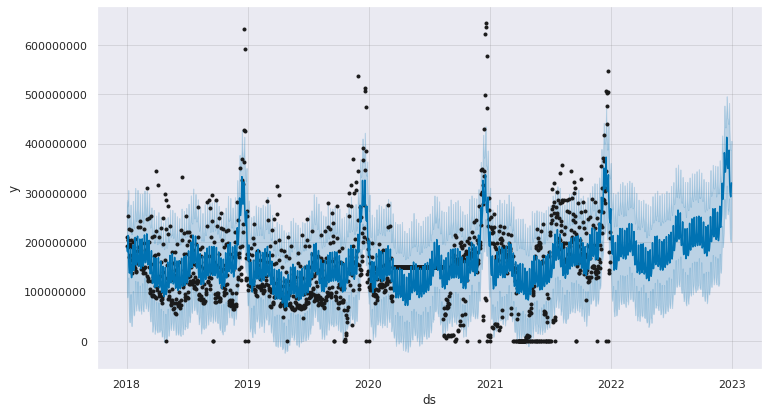

In [ ]:
forecast_plot = m.plot(forecast)
plt.ticklabel_format(style='plain', axis='y') 

In [ ]:
df_2022

store    pos       date     net_amount   item   size 
0       CL105  CL10501 2022-01-02     16798    GK9602     XL
1       CL306  CL30602 2022-01-02     11756    GL3727      S
2       CL306  CL30602 2022-01-02     12597    FT3154     XS
3       CL306  CL30602 2022-01-02     46210    GE0583     XL
4       CL306  CL30602 2022-01-02    -36126    FX2285    8.5
...       ...      ...        ...         ...     ...    ...
589331  CL153  CL15301 2022-03-14      7555    DZ9436     S,
589332  CL153  CL15301 2022-03-14       252    S49975  NS,,,
589333  CL153  CL15301 2022-03-14     54613    GA8928     L,
589334  CL153  CL15301 2022-03-14     67218    GW9999   11-,
589335  CL910  CL91003 2022-03-14       252    S49975  NS,,,

[589336 rows x 6 columns]

In [ ]:
df_2022_day = df_2022[['date', 'net_amount']].groupby(pd.Grouper(key= 'date', freq='D')).sum().reset_index()

In [ ]:
df_2022_day.head()

date     net_amount
0 2022-01-02   174440294
1 2022-01-03   133676692
2 2022-01-04   140473972
3 2022-01-05   138025519
4 2022-01-06   139773611

## Evaluation


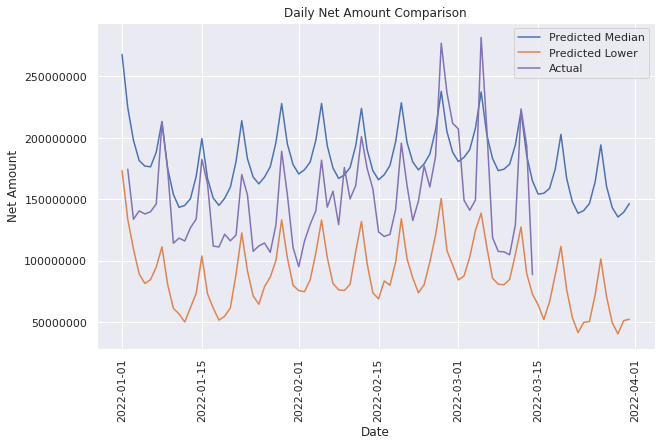

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Daily Net Amount Comparison')
sns.lineplot(data=forecast[(forecast.ds >= '2022-01') & (forecast.ds < '2022-04')], x='ds', y='yhat', label='Predicted Median')
sns.lineplot(data=forecast[(forecast.ds >= '2022-01') & (forecast.ds < '2022-04')], x='ds', y='yhat_lower', label='Predicted Lower')
sns.lineplot(data=df_2022_day, x='date', y='net_amount', color='C14',label='Actual')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Net Amount')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Modeling with Sklearn

## Sklearn Pre-Modeling

In [ ]:
df_preprocessed = df.copy()

In [ ]:
# Higher Outliers Values
qup = df_preprocessed['net_amount'].quantile(0.999995)

# Lower Outliers Values
qdown = df_preprocessed['net_amount'].quantile(0.000001)

# Filtering External (Outliers) Values
df_preprocessed = df_preprocessed[(df_preprocessed.net_amount < qup) & (df_preprocessed.net_amount > qdown)]

active_stores = df.groupby(pd.Grouper(key= 'date', freq='M'))['store'].unique().reset_index().iloc[-1,1]
active_stores

array(['CL105', 'CL111', 'CL115', 'CL118', 'CL119', 'CL121', 'CL123',
       'CL124', 'CL131', 'CL135', 'CL136', 'CL137', 'CL141', 'CL142',
       'CL145', 'CL148', 'CL149', 'CL151', 'CL152', 'CL153', 'CL154',
       'CL155', 'CL156', 'CL157', 'CL158', 'CL159', 'CL171', 'CL172',
       'CL173', 'CL179', 'CL184', 'CL186', 'CL187', 'CL202', 'CL305',
       'CL306', 'CL307', 'CL308', 'CL310', 'CL311', 'CL312', 'CL313',
       'CL314', 'CL315', 'CL910', 'CL317'], dtype=object)

In [ ]:
df_preprocessed = df.groupby(by=['store', pd.Grouper(key= 'date', freq='M')]).sum().reset_index()

In [ ]:
# Filters

print (f'Shape After Grouping by Store and Day    : {df_preprocessed.shape}')

#df_preprocessed = df_preprocessed[(df_preprocessed.date < '2020-03-14') | (df_preprocessed.date > '2020-08-13')]
#print (f'Shape After Filtering out COVID          : {df_preprocessed.shape}')

df_preprocessed = df_preprocessed[df_preprocessed.store != '*CL905']
print (f'Shape After Filtering out Store: *CL905  : {df_preprocessed.shape}')

#df_preprocessed = df_preprocessed[df_preprocessed.net_amount != 0]
#print (f"Shape After Filtering out 0's            : {df_preprocessed.shape}")

#df_preprocessed = df_preprocessed[df_preprocessed.store.isin (df_2022['store'].unique())]
#print (f"Shape After Filtering out Inactive Stores: {df_preprocessed.shape}")

#df_preprocessed = df_preprocessed[df_preprocessed.date.dt.year >= 2020]
#print (f"Shape After Filtering out 2018 & 2019    : {df_preprocessed.shape}")

#df_preprocessed = df_preprocessed[(df_preprocessed.net_amount < qup) & (df_preprocessed.net_amount > qdown)]
#print (f"Shape After Filtering Outliers           : {df_preprocessed.shape}")


Shape After Grouping by Store and Day    : (2102, 3)
Shape After Filtering out Store: *CL905  : (2101, 3)


In [ ]:
covid = df_preprocessed[(df_preprocessed.date >= '2020-03-14') & (df_preprocessed.date <= '2020-08-13')]

mean_2020 = df_preprocessed[df_preprocessed.date.dt.year == 2020]
mean_2020 = mean_2020['net_amount'][(mean_2020.date < '2020-03-14') | (mean_2020.date > '2020-08-13')]
mean_2020 = int(mean_2020.mean())
mean_2020

98505388

In [ ]:
df_preprocessed.loc[covid.index, 'net_amount'] = mean_2020
df_preprocessed.loc[covid.index]

store     date     net_amount
50    CL105 2020-03-31   98505388 
94    CL111 2020-03-31   98505388 
153   CL115 2020-03-31   98505388 
216   CL118 2020-03-31   98505388 
260   CL119 2020-03-31   98505388 
...     ...        ...         ...
1954  CL313 2020-07-31   98505388 
1974  CL314 2020-03-31   98505388 
2062  CL907 2020-03-31   98505388 
2072  CL908 2020-03-31   98505388 
2076  CL909 2020-03-31   98505388 

[62 rows x 3 columns]

## One Hot Encoding / Dummies

In [ ]:
df_preprocessed.columns

Index(['store', 'date', 'net_amount'], dtype='object')

In [ ]:
df_preprocessed['year'] = [str(l)[:4] for l in df_preprocessed['date']]
df_preprocessed['month'] = [str(l)[5:7] for l in df_preprocessed['date']]
df_preprocessed['day'] = [str(l)[8:10] for l in df_preprocessed['date']]

In [ ]:
df_preprocessed.head()

store     date     net_amount  year month day
1  CL104 2018-01-31   215077154  2018   01   31
2  CL104 2018-02-28   172819310  2018   02   28
3  CL104 2018-03-31   114069808  2018   03   31
4  CL104 2018-04-30   111274459  2018   04   30
5  CL104 2018-05-31    79728719  2018   05   31

In [ ]:
df_preprocessed.dtypes

store                 object
date          datetime64[ns]
net_amount             int64
year                  object
month                 object
day                   object
dtype: object

In [ ]:
df_dummies = pd.get_dummies(df_preprocessed.drop('date', axis=1))

In [ ]:
df_dummies['year_2022'] = 0

In [ ]:
organized_columns = ['net_amount', 'store_CL104', 'store_CL105', 'store_CL111',
       'store_CL112', 'store_CL113', 'store_CL115', 'store_CL117',
       'store_CL118', 'store_CL119', 'store_CL120', 'store_CL121',
       'store_CL123', 'store_CL124', 'store_CL125', 'store_CL126',
       'store_CL128', 'store_CL131', 'store_CL132', 'store_CL135',
       'store_CL136', 'store_CL137', 'store_CL139', 'store_CL141',
       'store_CL142', 'store_CL143', 'store_CL144', 'store_CL145',
       'store_CL146', 'store_CL148', 'store_CL149', 'store_CL150',
       'store_CL151', 'store_CL152', 'store_CL153', 'store_CL154',
       'store_CL155', 'store_CL156', 'store_CL157', 'store_CL158',
       'store_CL159', 'store_CL171', 'store_CL172', 'store_CL173',
       'store_CL177', 'store_CL178', 'store_CL179', 'store_CL180',
       'store_CL182', 'store_CL184', 'store_CL185', 'store_CL186',
       'store_CL187', 'store_CL202', 'store_CL302', 'store_CL305',
       'store_CL306', 'store_CL307', 'store_CL308', 'store_CL310',
       'store_CL311', 'store_CL312', 'store_CL313', 'store_CL314',
       'store_CL315', 'store_CL317', 'store_CL901', 'store_CL903',
       'store_CL904', 'store_CL905', 'store_CL906', 'store_CL907',
       'store_CL908', 'store_CL909', 'store_CL910', 'store_CL911',
       'store_CL912', 'store_CL914', 'year_2018', 'year_2019', 'year_2020',
       'year_2021', 'year_2022', 'month_01', 'month_02', 'month_03', 'month_04', 'month_05',
       'month_06', 'month_07', 'month_08', 'month_09', 'month_10', 'month_11',
       'month_12', 'day_28', 'day_29', 'day_30', 'day_31']

In [ ]:
df_dummies = df_dummies[organized_columns]

In [ ]:
df_dummies.dtypes

net_amount     int64
store_CL104    uint8
store_CL105    uint8
store_CL111    uint8
store_CL112    uint8
               ...  
month_12       uint8
day_28         uint8
day_29         uint8
day_30         uint8
day_31         uint8
Length: 99, dtype: object

In [ ]:
df_dummies.head()

net_amount  store_CL104  store_CL105  store_CL111  store_CL112  \
1   215077154       1            0            0            0        
2   172819310       1            0            0            0        
3   114069808       1            0            0            0        
4   111274459       1            0            0            0        
5    79728719       1            0            0            0        

   store_CL113  store_CL115  store_CL117  store_CL118  store_CL119  ...  \
1       0            0            0            0            0       ...   
2       0            0            0            0            0       ...   
3       0            0            0            0            0       ...   
4       0            0            0            0            0       ...   
5       0            0            0            0            0       ...   

   month_07  month_08  month_09  month_10  month_11  month_12  day_28  day_29  \
1      0         0         0         0         0         0        0       0     
2      0         0         0         0         0         0        1       0     
3      0         0         0         0         0         0        0       0     
4      0         0         0         0         0         0        0       0     
5      0         0         0         0         0         0        0       0     

   day_30  day_31  
1     0       1    
2     0       0    
3     0       1    
4     1       0    
5     0       1    

[5 rows x 99 columns]

## Dependencies

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import NotFittedError
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

## Defining X, Y, Test and Train

In [ ]:
x = df_dummies.drop('net_amount', axis=1)
y = df_dummies['net_amount']
print (f'{x.shape}\n {y.shape}')

(2101, 98)
 (2101,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1234)

print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1680, 98) (421, 98) (1680,) (421,)


## Creating the Pipelines

In [ ]:
# Useful to Train Multiple Models 
pipelines = {
    'ols':make_pipeline(LinearRegression()),
    'rf':make_pipeline(RandomForestRegressor(random_state=1234)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=1234)),
    'ridge':make_pipeline(Ridge(random_state=1234)),
    'lasso':make_pipeline(Lasso(random_state=1234)),
    'enet':make_pipeline(ElasticNet(random_state=1234)),
}

pipelines

{'enet': Pipeline(steps=[('elasticnet', ElasticNet(random_state=1234))]),
 'gb': Pipeline(steps=[('gradientboostingregressor',
                  GradientBoostingRegressor(random_state=1234))]),
 'lasso': Pipeline(steps=[('lasso', Lasso(random_state=1234))]),
 'ols': Pipeline(steps=[('linearregression', LinearRegression())]),
 'rf': Pipeline(steps=[('randomforestregressor',
                  RandomForestRegressor(random_state=1234))]),
 'ridge': Pipeline(steps=[('ridge', Ridge(random_state=1234))])}

In [ ]:
pipelines['ols'].get_params()

{'linearregression': LinearRegression(),
 'linearregression__copy_X': True,
 'linearregression__fit_intercept': True,
 'linearregression__n_jobs': None,
 'linearregression__normalize': 'deprecated',
 'linearregression__positive': False,
 'memory': None,
 'steps': [('linearregression', LinearRegression())],
 'verbose': False}

## Hyperparameter Grid

In [ ]:
# To Optimize the Models
hypergrid = {
    'ols': {              
    },
    'rf': {
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3]
    },
    'gb':{
        'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'ridge':{
        'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'lasso':{
        'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'enet':{
        'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

## Training the Models

In [ ]:
# Loop to Train the Models inside the Pipelines using the GridSearchCV for Model Optimization
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(x_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting training for ols.
ols has been successfully fit.
Starting training for rf.
rf has been successfully fit.
Starting training for gb.
gb has been successfully fit.
Starting training for ridge.
ridge has been successfully fit.
Starting training for lasso.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.735e+17, tolerance: 1.071e+15
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


lasso has been successfully fit.
Starting training for enet.
enet has been successfully fit.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.342e+18, tolerance: 1.071e+15
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


## Evaluation

### Predict, Calculate r2 Score and Mean Absolute Error

In [ ]:
# Save into a new DataFrame
df_model_evaluation = pd.DataFrame(columns=['Algo', 'R2 Score', 'Mean Absolute Error'])
index = 0

for algo, model in fit_models.items():
    yhat = model.predict(x_test)
    print('{} scores - R2:{} MAE:{}'.format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))
    
    index += 1
    df_model_evaluation.loc[index] = [algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)]

ols scores - R2:0.7896915804613835 MAE:22803404.249406178
rf scores - R2:0.8013264314142395 MAE:20148223.625318844
gb scores - R2:0.7441353931653872 MAE:27263940.71018868
ridge scores - R2:0.7912507356965888 MAE:22615442.50310871
lasso scores - R2:0.7921450312161729 MAE:22653923.391606912
enet scores - R2:0.7915594902709228 MAE:22611336.20500707


In [ ]:
# Sort Descending by R2 Score
df_model_evaluation = df_model_evaluation.sort_values(by='R2 Score', ascending=False).reset_index(drop= True)
df_model_evaluation

Algo   R2 Score  Mean Absolute Error
0     rf    0.80       20148223.63     
1  lasso    0.79       22653923.39     
2   enet    0.79       22611336.21     
3  ridge    0.79       22615442.50     
4    ols    0.79       22803404.25     
5     gb    0.74       27263940.71

### Graph Model Performance

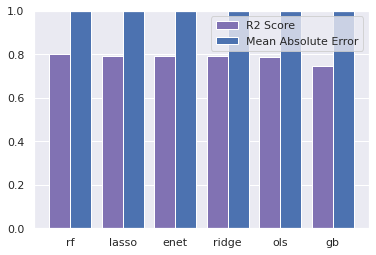

In [ ]:
plt.clf()
barwidth = 0.4
x_plot_1 = df_model_evaluation.index
x_plot_2 = x_plot_1+barwidth
y_plot_1 = df_model_evaluation['R2 Score']
y_plot_2 = df_model_evaluation['Mean Absolute Error']
x_ticks = df_model_evaluation['Algo']

plt.bar(x_plot_1, y_plot_1, width=barwidth, color='C254', label= 'R2 Score')
plt.bar(x_plot_2, y_plot_2, width=barwidth, color='C250', label= 'Mean Absolute Error')
plt.xticks(x_plot_1+barwidth/2, x_ticks)
plt.ylim(0,1) 
plt.legend()
plt.show()

### Select the Best Model

In [ ]:
best_model = df_model_evaluation.iloc[0,0]
best_model

'rf'

In [ ]:
df_compare = pd.DataFrame()

In [ ]:
df_compare['predicted'] = fit_models[best_model].predict(x_test)

In [ ]:
df_compare['actual'] = np.array(y_test)

In [ ]:
df_compare

predicted    actual  
0   123826025.97  185296032
1   136663128.92   98505388
2    93385587.79   64830400
3   101151818.12   84354685
4   145421584.76   23940540
..           ...        ...
416 203925417.97  207811288
417  26720466.94   26827307
418  89322447.82   60827400
419  38546435.18   46357572
420  50640242.75   52565986

[421 rows x 2 columns]

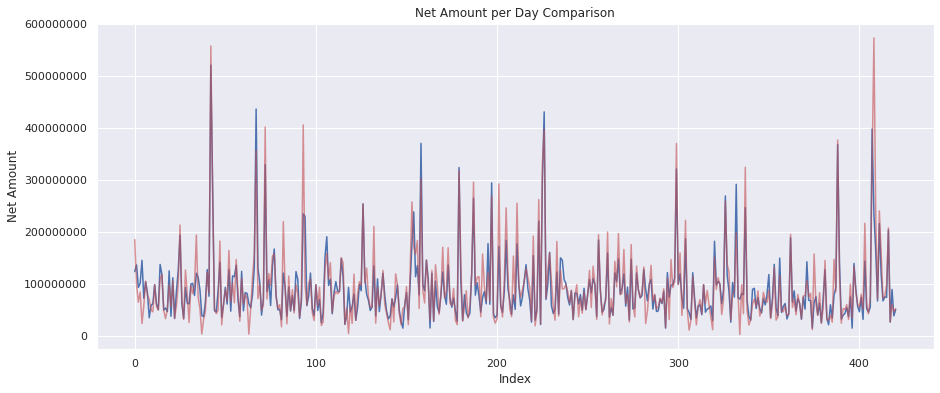

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Net Amount per Day Comparison')
sns.lineplot(data=df_compare, x=df_compare.index, y='predicted')
sns.lineplot(data=df_compare, x=df_compare.index, y='actual', color='r', alpha=0.6)
plt.ylabel('Net Amount')
plt.xlabel('Index')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

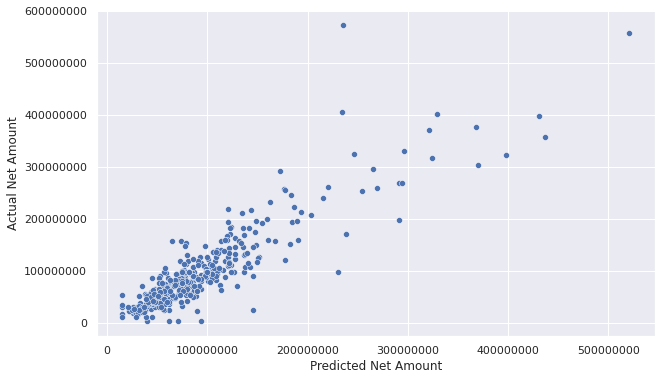

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_compare, x='predicted', y='actual')
plt.ylabel('Actual Net Amount')
plt.xlabel('Predicted Net Amount')
plt.ticklabel_format(style='plain', axis='both')
plt.show()

### Forward Test

In [ ]:
# Copy 'sales_2022' Dataframe for Future Manipulation
df_ftest = df_2022.copy()

In [ ]:
# Filtering the Incompleted Month of March 2022
df_ftest = df_ftest[df_ftest.date < '2022-03']

In [ ]:
# Group by Month then split Date into Strings to create a Dummy DF (Categorical Data as 1's and 0's)
df_ftest = df_ftest.groupby(by=['store', pd.Grouper(key= 'date', freq='M')]).sum().reset_index()

df_ftest['year'] = [str(l)[:4] for l in df_ftest['date']]
df_ftest['month'] = [str(l)[5:7] for l in df_ftest['date']]
df_ftest['day'] = [str(l)[8:10] for l in df_ftest['date']]

In [ ]:
df_ftest = df_ftest.set_index('date')

In [ ]:
# Create Dummy as Input for the Model
df_ftest_dummies = pd.get_dummies(df_ftest)

In [ ]:
# Sort by Date
df_ftest_dummies.sort_values(by='date', inplace=True)

In [ ]:
df_ftest_dummies.head()

net_amount  store_CL105  store_CL111  store_CL115  store_CL118  \
date                                                                         
2022-01-31   138035821       1            0            0            0        
2022-01-31    37951485       0            0            0            0        
2022-01-31    88338674       0            0            0            0        
2022-01-31   169743283       0            0            0            0        
2022-01-31    95608862       0            0            0            0        

            store_CL119  store_CL121  store_CL123  store_CL124  store_CL131  \
date                                                                          
2022-01-31       0            0            0            0            0        
2022-01-31       0            0            0            0            0        
2022-01-31       0            0            0            0            0        
2022-01-31       0            0            0            0            0        
2022-01-31       0            0            0            0            0        

            ...  store_CL313  store_CL314  store_CL315  store_CL317  \
date        ...                                                       
2022-01-31  ...       0            0            0            0        
2022-01-31  ...       0            0            0            0        
2022-01-31  ...       0            0            0            0        
2022-01-31  ...       0            0            0            0        
2022-01-31  ...       0            0            0            0        

            store_CL910  year_2022  month_01  month_02  day_28  day_31  
date                                                                    
2022-01-31       0           1          1         0        0       1    
2022-01-31       0           1          1         0        0       1    
2022-01-31       0           1          1         0        0       1    
2022-01-31       0           1          1         0        0       1    
2022-01-31       0           1          1         0        0       1    

[5 rows x 51 columns]

#### Organized the Input Columns to Match the Traning Dataframe

In [ ]:
# Create the Organized Dummy Dataframe
df_ftest_dummies_organized = pd.DataFrame(columns=organized_columns)

In [ ]:
# Match Columns between the Organized Dummy and the Non Organized Dummy and Fill Nulls with 0
df_ftest_dummies_organized = pd.concat([df_ftest_dummies_organized, df_ftest_dummies]).fillna(0)

In [ ]:
# Making the Prediction
yhat_ft = fit_models[best_model].predict(df_ftest_dummies_organized.drop('net_amount', axis=1))

In [ ]:
# Bringing Back the Original (Non-dummy) Input Dataframe and Sorting Values to Match Predictions
df_ftest.sort_values(by='date', inplace=True)

In [ ]:
# Unifying DF and Predictions
df_ftest['predicted_net_amount'] = yhat_ft.astype(int)

In [ ]:
df_ftest.columns

Index(['store', 'net_amount', 'year', 'month', 'day', 'predicted_net_amount'], dtype='object')

In [ ]:
# Selecting Useful Columns
df_ftest = df_ftest[['store', 'net_amount', 'predicted_net_amount']].reset_index()

In [ ]:
# Calculating the Difference in %
df_ftest['difference%'] = round((df_ftest['predicted_net_amount'] * 100) / df_ftest['net_amount'] - 100,2)

In [ ]:
df_ftest.head()

date    store   net_amount  predicted_net_amount  difference%
0 2022-01-31  CL105   138035821        147203326           6.64   
1 2022-01-31  CL152    37951485         40127048           5.73   
2 2022-01-31  CL153    88338674         83584520          -5.38   
3 2022-01-31  CL154   169743283         92409429         -45.56   
4 2022-01-31  CL155    95608862         74290208         -22.30

In [ ]:
# Calculating the Mean Difference in %
df_ftest['difference%'].mean()

-7.085222222222222

#### Visualizing the Predictions and Actual Values for Each Store

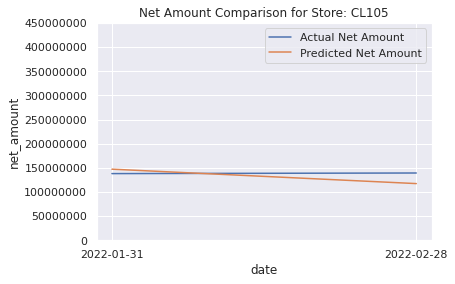

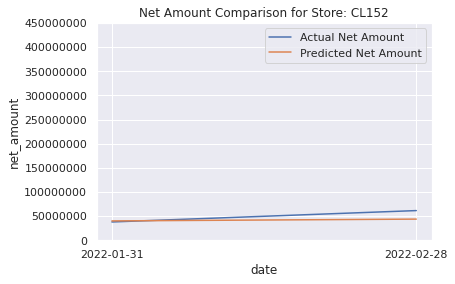

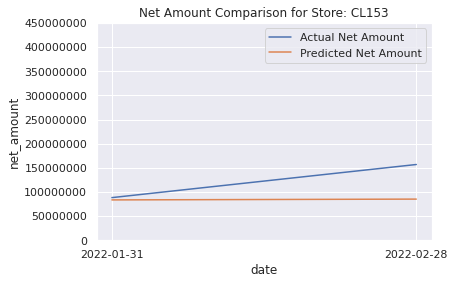

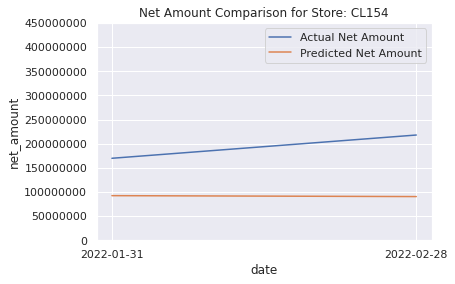

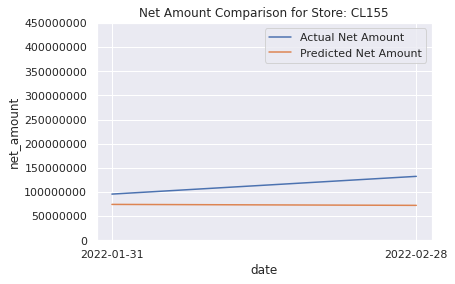

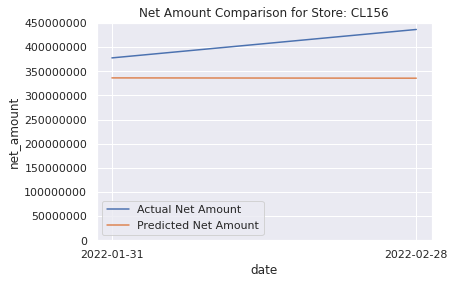

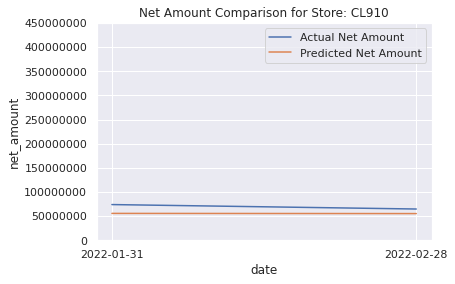

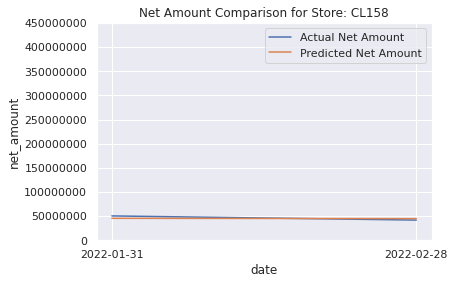

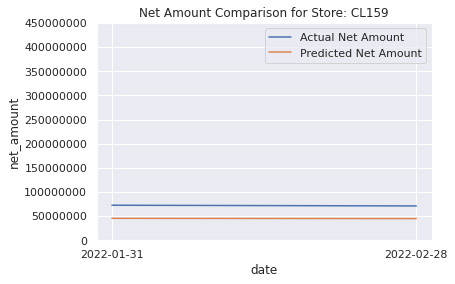

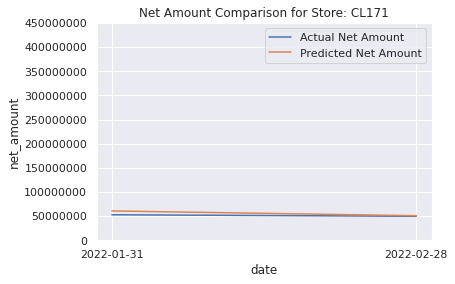

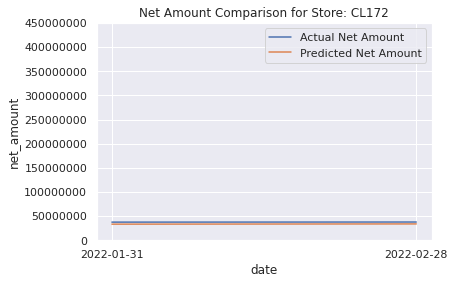

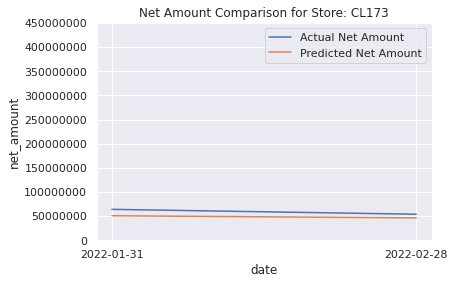

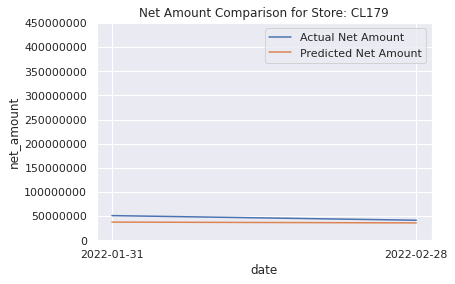

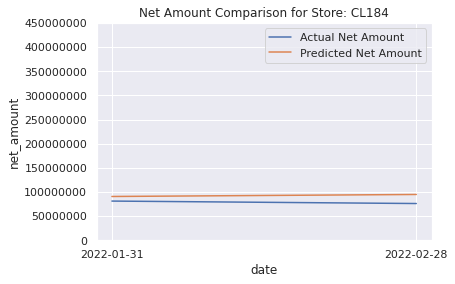

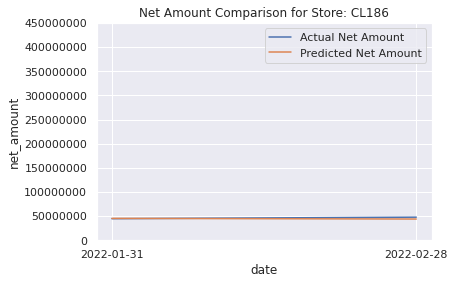

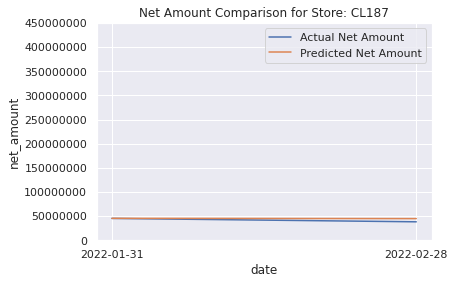

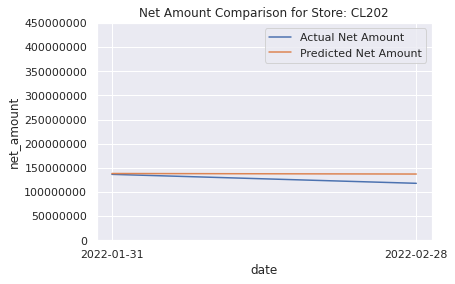

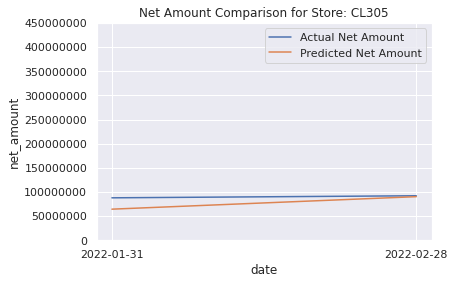

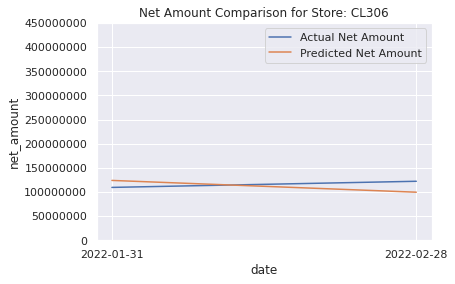

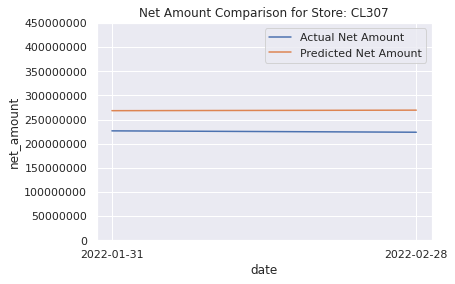

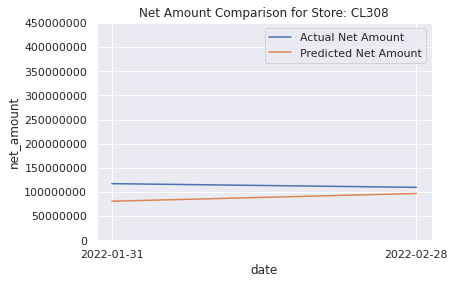

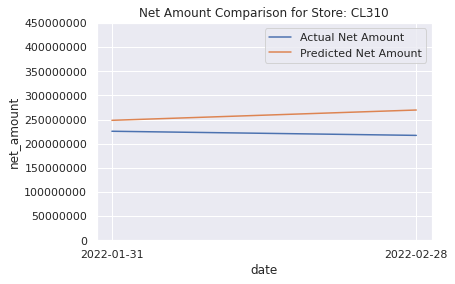

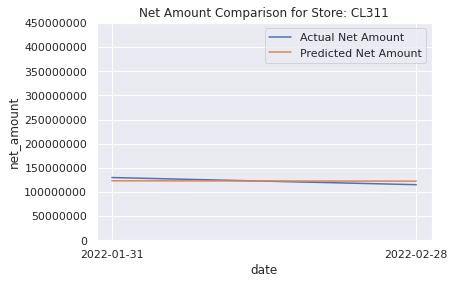

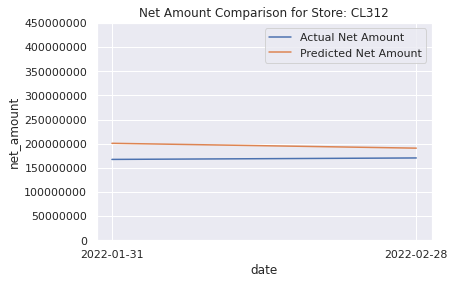

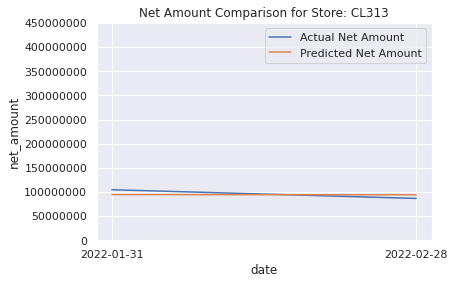

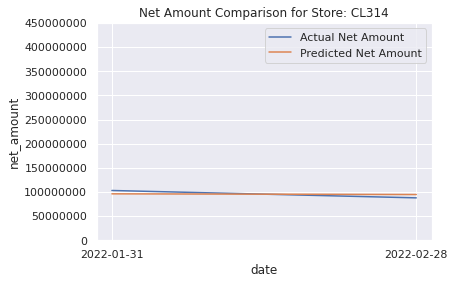

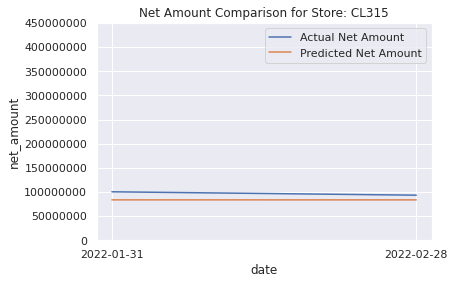

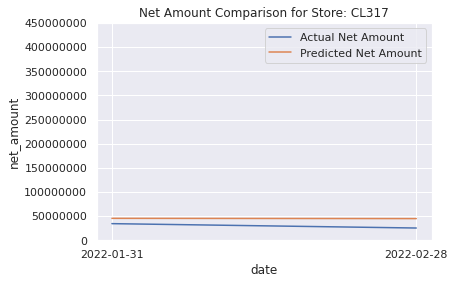

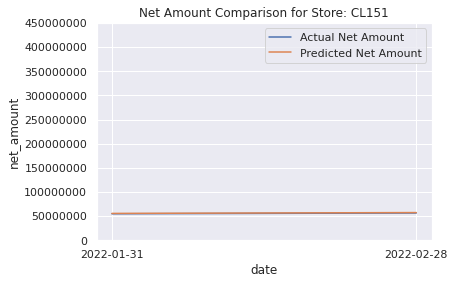

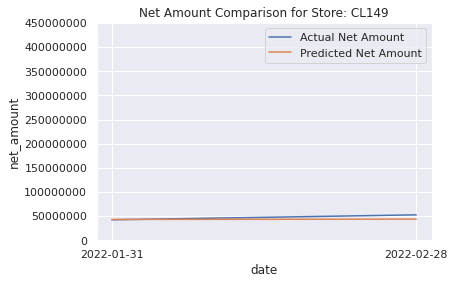

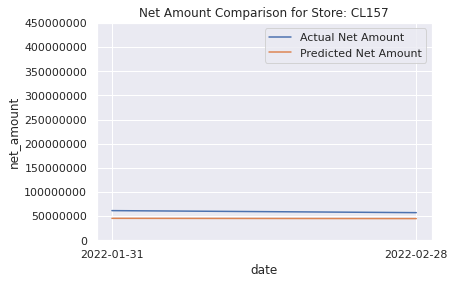

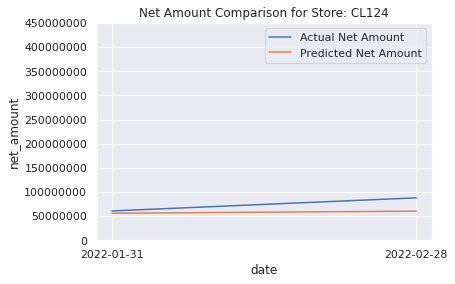

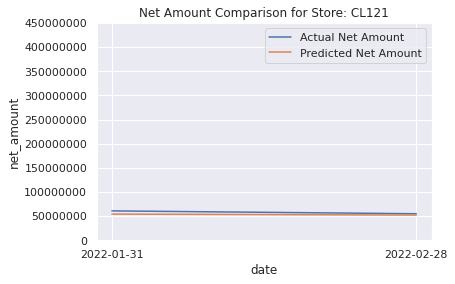

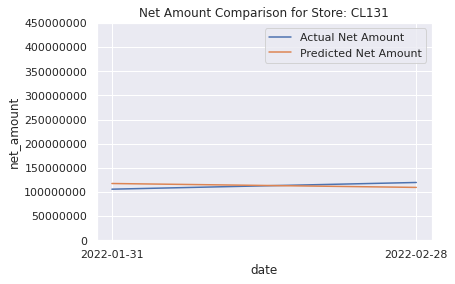

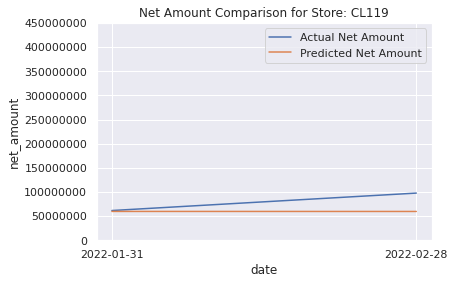

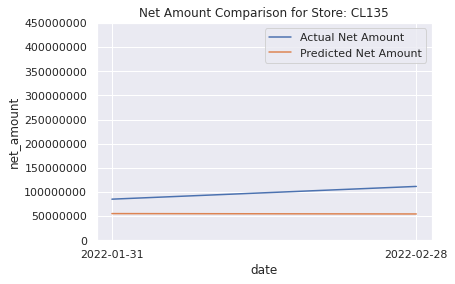

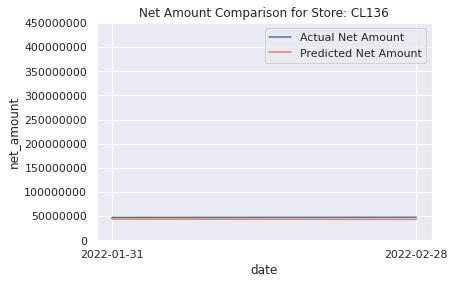

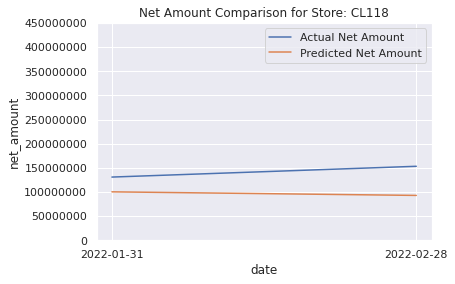

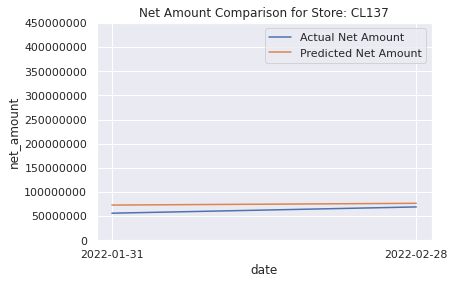

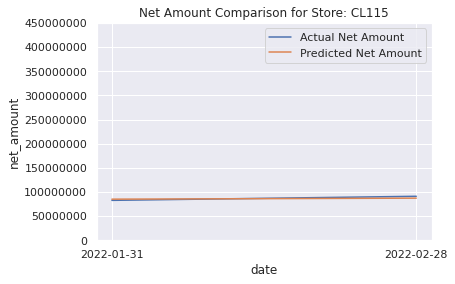

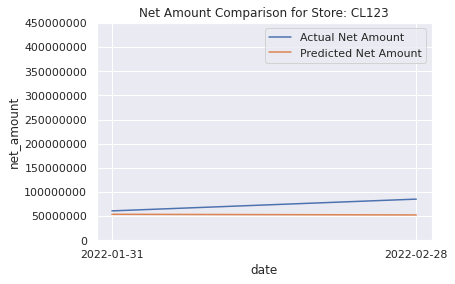

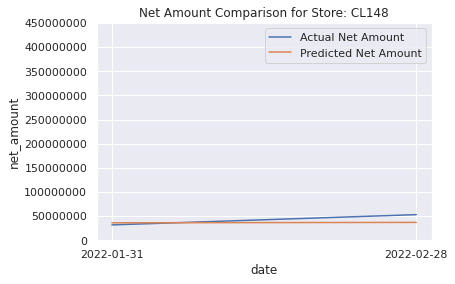

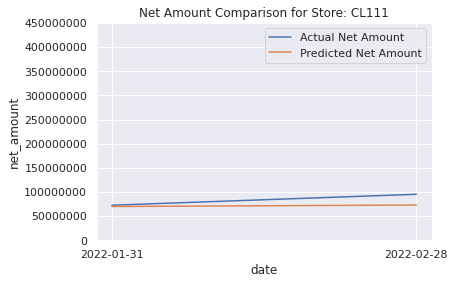

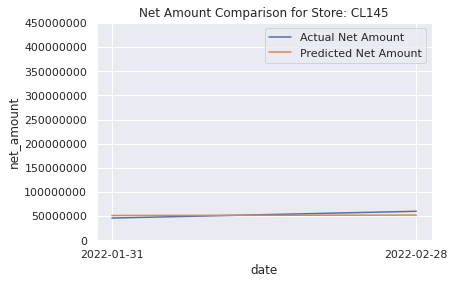

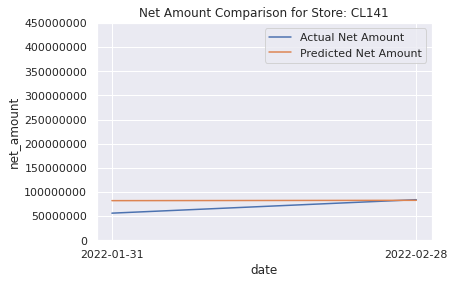

In [ ]:
for store_iter in df_ftest['store'].unique():
  plt.figure(figsize=(6,4))
  plt.title('Net Amount Comparison for Store: ' + store_iter)
  sns.lineplot(data=df_ftest[df_ftest.store == store_iter], x='date', y='net_amount', label='Actual Net Amount')
  sns.lineplot(data=df_ftest[df_ftest.store == store_iter], x='date', y='predicted_net_amount', label='Predicted Net Amount')
  plt.ticklabel_format(style='plain', axis='y')
  plt.yticks(ticks=np.arange(0,500000000,step=50000000))
  plt.xticks(df_ftest[df_ftest.store == store_iter]['date'])
  plt.show()

#### Visualizing the Predictions and Actual Values for All Store

In [ ]:
# Group by Date and Select Useful Columns
df_ftest.groupby('date').sum()[['net_amount','predicted_net_amount']]

net_amount  predicted_net_amount
date                                        
2022-01-31  4141613257       3935067022     
2022-02-28  4505455670       3914058992

In [ ]:
monthly_comparison = df_ftest.groupby('date').sum()[['net_amount','predicted_net_amount']]

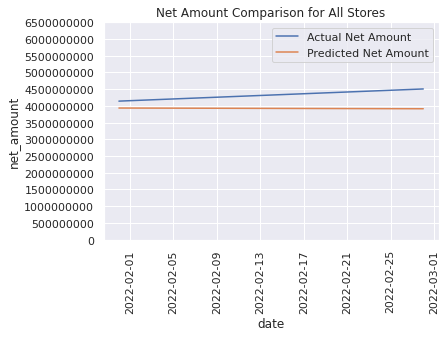

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Net Amount Comparison for All Stores')
sns.lineplot(data=monthly_comparison, x='date', y='net_amount', label='Actual Net Amount')
sns.lineplot(data=monthly_comparison, x='date', y='predicted_net_amount', label='Predicted Net Amount')
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(ticks=np.arange(0,7000000000,step=500000000))
plt.xticks(rotation=90)
plt.show()

# Deployment

### Dependencies

In [ ]:
import joblib

### Save the Model

In [ ]:
# Save it Into a 'pkl' for Later Use
joblib.dump(fit_models[best_model], best_model + '_month_predictions.pkl')

['rf_day.pkl']